In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
file_path = "machine failure.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
#dataset overview

In [6]:
print("📌 First 5 rows of the dataset:")
print(df.head())

📌 First 5 rows of the dataset:
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1

In [7]:
print("\n📌 Dataset Information:")
print(df.info())


📌 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtyp

In [8]:
print("\n📌 Summary Statistics:")
print(df.describe())


📌 Summary Statistics:
               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800

In [9]:
# Checking for missing values

In [10]:
print("\n📌 Missing Values in Each Column:")
print(df.isnull().sum())


📌 Missing Values in Each Column:
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


In [11]:
# Handling missing values

In [12]:
df.fillna(df.mean(), inplace=True)

TypeError: Could not convert ['M14860L47181L47182L47183L47184M14865L47186L47187M14868M14869H29424H29425M14872M14873L47194L47195M14876M14877H29432M14879H29434L47201M14882L47203M14884L47205L47206H29441L47208L47209M14890L47211L47212L47213M14894M14895M14896L47217H29452L47219L47220L47221M14902H29457M14904L47225M14906L47227H29462M14909L47230L47231H29466L47233L47234L47235L47236L47237M14918L47239L47240M14921L47242M14923L47244L47245M14926H29481L47248L47249M14930L47251L47252L47253L47254L47255L47256L47257L47258L47259H29494L47261L47262L47263L47264M14945H29500L47267M14948M14949L47270L47271M14952L47273L47274M14955M14956M14957L47278L47279L47280L47281L47282M14963L47284L47285L47286M14967H29522L47289L47290H29525M14972M14973L47294L47295L47296L47297M14978L47299L47300L47301L47302L47303L47304L47305L47306L47307L47308L47309L47310L47311M14992M14993L47314M14995H29550L47317H29552L47319L47320L47321M15002H29557M15004L47325H29560L47327M15008L47329L47330M15011M15012L47333L47334H29569M15016H29571M15018L47339L47340L47341L47342M15023M15024L47345H29580H29581L47348L47349M15030L47351M15032M15033L47354L47355L47356L47357L47358L47359L47360H29595M15042L47363L47364L47365L47366L47367L47368M15049L47370L47371H29606H29607M15054L47375H29610M15057L47378L47379L47380L47381M15062L47383L47384M15065L47386M15067L47388L47389L47390L47391H29626L47393M15074L47395L47396L47397L47398M15079L47400H29635L47402L47403L47404L47405L47406L47407M15088L47409L47410L47411L47412L47413L47414M15095L47416M15097L47418L47419M15100L47421L47422L47423M15104M15105L47426L47427L47428L47429L47430M15111L47432L47433L47434L47435L47436L47437L47438M15119M15120L47441M15122M15123L47444L47445H29680L47447H29682L47449H29684M15131L47452L47453L47454L47455M15136H29691M15138L47459M15140L47461M15142L47463L47464L47465L47466L47467H29702L47469L47470L47471L47472H29707M15154M15155L47476L47477H29712M15159L47480L47481H29716M15163L47484L47485L47486M15167L47488M15169H29724M15171L47492L47493M15174L47495L47496L47497L47498L47499H29734L47501L47502L47503M15184L47505L47506L47507H29742H29743M15190M15191M15192L47513M15194L47515M15196L47517L47518M15199L47520M15201L47522L47523M15204L47525M15206L47527L47528L47529H29764M15211M15212H29767L47534L47535M15216L47537M15218M15219M15220L47541H29776L47543L47544L47545M15226M15227L47548H29783M15230L47551M15232L47553L47554L47555M15236M15237L47558L47559L47560L47561L47562M15243L47564M15245L47566L47567L47568M15249L47570L47571M15252M15253L47574L47575L47576M15257H29812L47579L47580L47581L47582L47583L47584L47585L47586M15267M15268L47589M15270L47591L47592L47593L47594L47595L47596L47597L47598M15279M15280M15281L47602L47603L47604M15285L47606M15287M15288L47609L47610L47611M15292M15293M15294L47615L47616L47617L47618M15299L47620H29855L47622H29857L47624L47625L47626M15307L47628L47629M15310H29865M15312L47633L47634L47635H29870L47637L47638L47639H29874L47641L47642L47643L47644M15325L47646L47647L47648M15329H29884H29885M15332M15333L47654L47655L47656H29891L47658M15339L47660M15341L47662L47663L47664M15345M15346M15347L47668M15349L47670L47671L47672L47673L47674H29909M15356L47677L47678L47679M15360M15361L47682M15363M15364L47685L47686H29921L47688M15369L47690L47691L47692L47693L47694L47695L47696M15377L47698M15379L47700L47701M15382L47703L47704L47705L47706M15387M15388L47709M15390L47711L47712L47713L47714H29949L47716H29951M15398M15399L47720L47721L47722H29957M15404L47725L47726M15407L47728L47729L47730L47731M15412M15413H29968M15415L47736M15417L47738L47739L47740M15421L47742L47743H29978H29979M15426M15427L47748M15429L47750M15431L47752L47753M15434M15435H29990L47757L47758M15439M15440L47761L47762H29997H29998L47765L47766H30001L47768L47769L47770H30005H30006L47773H30008M15455M15456H30011L47778H30013L47780L47781L47782L47783L47784M15465L47786M15467L47788L47789L47790L47791L47792L47793M15474L47795H30030M15477H30032L47799M15480L47801M15482L47803H30038L47805L47806L47807M15488L47809L47810L47811H30046L47813L47814L47815L47816L47817L47818L47819M15500L47821M15502M15503H30058L47825M15506L47827H30062M15509L47830L47831L47832L47833L47834L47835M15516L47837L47838L47839M15520M15521M15522L47843L47844L47845L47846L47847L47848H30083L47850L47851M15532L47853L47854M15535H30090L47857M15538L47859M15540M15541H30096L47863L47864M15545M15546M15547H30102H30103H30104L47871L47872L47873L47874L47875M15556M15557L47878H30113M15560L47881M15562H30117L47884L47885M15566L47887M15568M15569M15570L47891L47892L47893L47894L47895H30130L47897L47898L47899L47900L47901L47902M15583L47904L47905M15586H30141M15588L47909M15590M15591L47912M15593H30148L47915L47916H30151L47918L47919M15600L47921L47922L47923L47924L47925L47926L47927H30162L47929L47930M15611L47932L47933M15614H30169L47936L47937L47938M15619L47940L47941M15622L47943L47944L47945L47946L47947L47948L47949L47950H30185H30186L47953L47954L47955L47956L47957L47958L47959M15640L47961L47962H30197L47964M15645L47966L47967M15648M15649L47970L47971L47972M15653H30208L47975M15656L47977M15658M15659M15660L47981L47982H30217M15664M15665M15666L47987L47988L47989L47990L47991L47992L47993M15674M15675L47996L47997L47998L47999L48000L48001M15682M15683L48004L48005L48006L48007L48008L48009L48010M15691L48012L48013H30248M15695L48016L48017H30252M15699L48020L48021M15702L48023L48024L48025M15706L48027L48028H30263L48030M15711M15712L48033M15714L48035L48036M15717M15718H30273H30274M15721H30276L48043M15724L48045L48046H30281M15728L48049L48050L48051M15732L48053L48054M15735L48056M15737M15738L48059M15740L48061M15742L48063L48064L48065L48066H30301M15748L48069L48070L48071L48072M15753L48074M15755L48076L48077L48078H30313L48080H30315L48082L48083H30318L48085M15766M15767M15768L48089L48090M15771L48092L48093M15774M15775M15776L48097M15778L48099M15780H30335M15782M15783L48104H30339L48106H30341L48108L48109M15790L48111L48112L48113M15794M15795M15796L48117L48118L48119L48120L48121M15802M15803M15804M15805L48126L48127M15808L48129L48130H30365L48132L48133H30368L48135H30370M15817L48138L48139L48140L48141M15822L48143L48144L48145M15826M15827L48148L48149L48150L48151L48152L48153L48154M15835M15836L48157M15838L48159L48160L48161L48162L48163L48164L48165H30400M15847H30402M15849L48170M15851L48172M15853M15854L48175M15856M15857M15858L48179L48180L48181L48182L48183H30418L48185L48186M15867L48188M15869M15870M15871M15872M15873L48194L48195M15876L48197L48198L48199L48200M15881L48202L48203L48204L48205L48206M15887L48208M15889L48210L48211L48212H30447M15894L48215M15896H30451L48218L48219L48220L48221L48222L48223L48224H30459L48226M15907L48228L48229L48230L48231L48232M15913H30468L48235L48236L48237L48238M15919H30474L48241L48242M15923M15924L48245M15926L48247L48248M15929M15930L48251M15932L48253L48254H30489L48256L48257H30492L48259L48260L48261H30496L48263M15944L48265L48266H30501M15948M15949L48270L48271M15952M15953L48274L48275L48276H30511M15958M15959H30514H30515L48282M15963L48284M15965L48286M15967L48288L48289L48290H30525M15972M15973H30528M15975L48296L48297L48298L48299H30534L48301L48302H30537M15984M15985L48306M15987M15988L48309L48310L48311L48312M15993M15994L48315L48316L48317L48318M15999M16000L48321L48322L48323L48324L48325L48326M16007L48328L48329L48330L48331L48332H30567L48334H30569H30570L48337L48338L48339H30574L48341L48342L48343L48344L48345M16026L48347L48348L48349M16030H30585L48352H30587M16034M16035M16036M16037L48358L48359H30594L48361L48362L48363L48364L48365L48366M16047L48368M16049L48370M16051M16052L48373M16054M16055M16056M16057H30612M16059M16060L48381M16062H30617L48384L48385H30620M16067L48388H30623L48390H30625L48392M16073M16074L48395L48396L48397M16078M16079L48400M16081L48402L48403L48404H30639L48406L48407M16088L48409M16090M16091L48412M16093H30648H30649H30650M16097M16098H30653L48420M16101L48422M16103L48424M16105H30660L48427L48428L48429L48430M16111L48432L48433H30668H30669M16116L48437L48438M16119L48440H30675H30676L48443M16124L48445L48446M16127L48448L48449M16130H30685H30686L48453H30688M16135M16136M16137L48458M16139H30694H30695L48462L48463L48464M16145L48466L48467M16148M16149L48470M16151M16152H30707L48474L48475L48476L48477M16158M16159L48480L48481L48482L48483L48484L48485L48486L48487L48488L48489L48490L48491L48492L48493M16174L48495L48496L48497M16178L48499M16180L48501H30736L48503M16184H30739L48506L48507M16188H30743L48510H30745L48512M16193L48514L48515L48516H30751L48518M16199L48520M16201M16202L48523L48524L48525L48526L48527L48528L48529L48530L48531M16212M16213L48534M16215L48536L48537M16218L48539H30774M16221L48542L48543L48544L48545M16226M16227H30782M16229L48550M16231M16232M16233L48554M16235M16236L48557H30792L48559L48560M16241L48562M16243L48564M16245L48566L48567H30802L48569L48570L48571M16252L48573L48574L48575L48576L48577L48578L48579H30814H30815M16262L48583M16264L48585L48586L48587L48588L48589M16270L48591M16272M16273M16274L48595M16276L48597L48598L48599M16280L48601L48602L48603L48604L48605M16286L48607L48608M16289L48610M16291L48612L48613M16294H30849H30850H30851L48618M16299M16300L48621M16302L48623L48624L48625M16306M16307M16308H30863M16310L48631L48632L48633L48634L48635L48636L48637L48638L48639L48640L48641L48642L48643L48644L48645L48646L48647M16328L48649L48650L48651M16332M16333M16334M16335L48656L48657L48658L48659M16340M16341M16342L48663M16344M16345M16346L48667L48668M16349L48670M16351M16352L48673M16354H30909L48676L48677L48678M16359M16360M16361L48682L48683L48684L48685L48686M16367M16368L48689M16370L48691H30926L48693M16374M16375L48696M16377H30932M16379L48700M16381H30936L48703L48704L48705L48706H30941L48708L48709L48710H30945M16392M16393L48714L48715M16396M16397L48718M16399M16400L48721L48722L48723L48724M16405L48726L48727M16408L48729L48730L48731L48732L48733M16414L48735H30970L48737M16418L48739M16420L48741L48742L48743M16424L48745M16426L48747L48748M16429L48750L48751L48752L48753L48754L48755L48756L48757L48758L48759M16440M16441H30996L48763M16444L48765M16446M16447L48768M16449L48770L48771L48772L48773M16454L48775L48776L48777L48778L48779M16460L48781H31016M16463L48784L48785L48786L48787L48788L48789L48790M16471M16472L48793M16474L48795H31030L48797L48798L48799L48800L48801H31036L48803M16484L48805M16486L48807L48808M16489L48810L48811L48812L48813H31048L48815L48816L48817L48818M16499L48820M16501H31056L48823L48824L48825M16506L48827L48828H31063M16510L48831H31066L48833L48834M16515L48836M16517H31072L48839L48840M16521H31076M16523L48844H31079L48846L48847L48848L48849L48850L48851L48852M16533L48854L48855H31090M16537L48858L48859M16540M16541H31096M16543L48864L48865H31100L48867L48868L48869M16550L48871M16552H31107L48874L48875L48876M16557L48878L48879M16560L48881L48882M16563M16564M16565L48886L48887L48888L48889L48890L48891L48892L48893L48894L48895L48896L48897M16578L48899L48900L48901M16582L48903M16584M16585L48906M16587L48908M16589M16590M16591H31146L48913M16594L48915L48916L48917H31152H31153M16600M16601L48922M16603M16604L48925L48926L48927H31162L48929M16610L48931L48932L48933M16614L48935M16616M16617L48938H31173L48940L48941H31176L48943H31178L48945M16626M16627M16628L48949H31184L48951L48952L48953M16634L48955L48956H31191L48958M16639L48960L48961L48962H31197L48964L48965L48966L48967L48968L48969L48970L48971M16652L48973M16654M16655H31210M16657M16658M16659M16660M16661H31216L48983L48984H31219H31220L48987L48988L48989L48990M16671L48992L48993L48994M16675L48996L48997M16678M16679L49000L49001L49002L49003L49004M16685H31240M16687L49008L49009L49010M16691M16692L49013L49014H31249L49016L49017M16698L49019M16700L49021H31256L49023M16704L49025H31260L49027H31262L49029M16710M16711M16712L49033M16714H31269M16716L49037M16718L49039L49040M16721L49042M16723L49044L49045M16726L49047L49048M16729L49050L49051L49052L49053L49054L49055L49056M16737M16738M16739L49060L49061M16742M16743M16744L49065L49066M16747M16748H31303L49070L49071M16752L49073H31308L49075L49076L49077L49078L49079H31314M16761L49082L49083M16764L49085L49086L49087L49088L49089H31324M16771M16772M16773L49094L49095L49096M16777M16778L49099L49100L49101L49102L49103L49104L49105L49106H31341L49108M16789M16790M16791M16792L49113L49114M16795M16796L49117L49118M16799L49120L49121L49122L49123L49124L49125L49126L49127L49128M16809M16810L49131L49132L49133L49134L49135M16816H31371H31372M16819L49140L49141L49142L49143M16824L49145L49146L49147L49148H31383M16830L49151L49152L49153L49154L49155M16836M16837L49158H31393M16840L49161M16842M16843M16844L49165L49166M16847H31402L49169L49170M16851L49172M16853M16854L49175M16856L49177H31412L49179L49180L49181L49182M16863L49184L49185M16866L49187L49188M16869L49190L49191L49192L49193L49194L49195L49196L49197L49198M16879H31434L49201L49202L49203M16884L49205M16886L49207M16888L49209L49210L49211L49212H31447M16894M16895L49216H31451L49218M16899L49220L49221M16902M16903L49224M16905L49226L49227L49228M16909M16910M16911L49232L49233M16914L49235L49236L49237M16918H31473L49240L49241M16922L49243L49244L49245L49246L49247M16928H31483L49250M16931L49252L49253L49254L49255L49256L49257M16938M16939L49260M16941H31496H31497L49264L49265H31500L49267L49268L49269L49270L49271L49272L49273L49274L49275M16956M16957L49278L49279M16960L49281L49282M16963M16964L49285L49286M16967H31522M16969H31524L49291L49292L49293H31528L49295M16976H31531H31532M16979H31534M16981M16982L49303L49304L49305L49306H31541L49308H31543L49310L49311L49312H31547L49314L49315L49316L49317L49318L49319L49320M17001L49322M17003L49324L49325L49326L49327L49328L49329H31564M17011M17012H31567M17014L49335M17016M17017M17018M17019L49340L49341L49342L49343L49344L49345M17026H31581M17028L49349M17030L49351L49352M17033L49354M17035M17036M17037L49358L49359H31594H31595M17042M17043L49364L49365L49366M17047L49368H31603M17050L49371L49372M17053M17054L49375M17056L49377M17058M17059L49380L49381M17062L49383M17064L49385L49386L49387H31622L49389L49390M17071L49392L49393H31628H31629L49396L49397L49398M17079M17080L49401L49402L49403M17084M17085M17086L49407H31642L49409L49410L49411L49412L49413L49414M17095M17096L49417L49418L49419L49420L49421L49422L49423M17104M17105L49426M17107M17108L49429M17110H31665H31666L49433L49434L49435L49436L49437L49438L49439H31674M17121L49442M17123M17124M17125L49446L49447L49448L49449L49450L49451M17132L49453L49454L49455L49456H31691M17138L49459L49460L49461L49462L49463L49464L49465M17146L49467M17148L49469M17150M17151L49472L49473L49474L49475L49476L49477L49478L49479L49480M17161L49482L49483L49484H31719L49486H31721L49488L49489M17170M17171M17172M17173L49494L49495L49496L49497L49498M17179H31734M17181L49502M17183L49504L49505M17186M17187L49508L49509M17190L49511L49512L49513L49514L49515L49516L49517L49518L49519L49520L49521M17202L49523M17204L49525L49526L49527L49528M17209L49530L49531M17212L49533L49534M17215H31770L49537M17218L49539H31774M17221H31776L49543L49544L49545L49546M17227M17228M17229L49550L49551M17232L49553M17234M17235M17236M17237L49558H31793L49560L49561L49562L49563M17244L49565L49566M17247M17248L49569L49570L49571L49572L49573L49574M17255M17256L49577L49578M17259H31814M17261L49582H31817M17264L49585L49586M17267L49588L49589L49590L49591L49592L49593L49594M17275L49596L49597L49598M17279H31834L49601L49602M17283L49604L49605M17286L49607M17288L49609M17290M17291L49612L49613M17294L49615H31850L49617M17298L49619L49620L49621M17302L49623L49624H31859L49626L49627L49628L49629L49630L49631M17312L49633L49634L49635L49636L49637L49638L49639L49640M17321L49642L49643M17324L49645L49646M17327M17328L49649L49650L49651L49652M17333L49654L49655H31890L49657M17338L49659L49660L49661L49662M17343H31898L49665M17346H31901L49668H31903H31904L49671H31906M17353L49674M17355M17356M17357L49678M17359L49680M17361L49682L49683L49684L49685M17366H31921L49688L49689L49690M17371L49692L49693L49694L49695L49696L49697M17378L49699L49700L49701M17382L49703M17384M17385L49706L49707L49708M17389L49710M17391L49712L49713L49714L49715L49716H31951L49718L49719L49720H31955H31956L49723L49724M17405L49726L49727M17408L49729L49730L49731H31966L49733L49734L49735M17416M17417M17418L49739M17420L49741L49742L49743L49744L49745M17426L49747L49748H31983L49750M17431M17432L49753L49754L49755L49756L49757L49758L49759L49760L49761L49762L49763L49764M17445L49766L49767L49768L49769L49770L49771L49772H32007L49774M17455L49776L49777L49778M17459L49780L49781L49782M17463M17464L49785H32020L49787L49788L49789H32024L49791L49792M17473L49794L49795L49796L49797M17478L49799L49800M17481M17482M17483H32038L49805L49806M17487H32042L49809L49810H32045M17492L49813L49814H32049L49816L49817L49818M17499M17500H32055L49822M17503L49824H32059M17506L49827L49828M17509L49830L49831L49832L49833L49834M17515L49836M17517L49838H32073L49840M17521M17522L49843M17524L49845H32080M17527M17528H32083L49850M17531L49852L49853L49854L49855L49856L49857L49858L49859L49860L49861M17542L49863L49864L49865L49866L49867L49868L49869L49870L49871L49872M17553M17554L49875L49876L49877L49878L49879L49880L49881L49882M17563M17564L49885M17566M17567L49888L49889L49890L49891H32126M17573M17574M17575L49896M17577L49898L49899L49900M17581L49902L49903M17584L49905M17586L49907L49908L49909L49910M17591L49912L49913H32148L49915M17596M17597M17598L49919L49920L49921L49922L49923L49924M17605L49926L49927L49928M17609H32164L49931M17612L49933H32168L49935L49936L49937M17618L49939L49940L49941L49942L49943M17624M17625M17626L49947L49948M17629L49950L49951L49952L49953L49954L49955L49956L49957L49958L49959M17640L49961M17642M17643L49964L49965M17646M17647L49968H32203L49970H32205L49972L49973L49974M17655L49976M17657L49978L49979M17660M17661M17662L49983L49984L49985L49986M17667L49988L49989L49990L49991M17672L49993L49994M17675L49996L49997L49998L49999L50000M17681L50002M17683M17684L50005M17686L50007M17688L50009M17690M17691M17692L50013L50014L50015M17696L50017L50018M17699H32254L50021L50022L50023L50024L50025L50026L50027M17708L50029L50030L50031M17712M17713L50034L50035H32270M17717L50038L50039H32274L50041L50042L50043H32278H32279L50046H32281L50048L50049M17730M17731L50052H32287L50054M17735M17736M17737H32292M17739L50060M17741L50062L50063L50064M17745H32300M17747M17748M17749L50070L50071L50072M17753L50074M17755M17756M17757M17758L50079L50080L50081M17762M17763L50084L50085L50086M17767L50088L50089L50090M17771L50092L50093H32328L50095L50096L50097M17778L50099L50100L50101L50102M17783L50104M17785L50106M17787M17788M17789H32344L50111L50112M17793M17794M17795M17796L50117L50118L50119L50120M17801L50122H32357L50124H32359M17806L50127L50128M17809M17810L50131H32366L50133H32368M17815M17816L50137M17818M17819L50140L50141L50142M17823L50144M17825L50146L50147M17828L50149M17830M17831M17832M17833M17834H32389M17836L50157H32392L50159L50160H32395L50162L50163L50164L50165L50166M17847M17848L50169L50170M17851M17852M17853L50174L50175M17856L50177L50178L50179H32414L50181M17862M17863M17864L50185L50186L50187M17868M17869L50190M17871L50192L50193L50194L50195L50196L50197M17878L50199L50200L50201L50202L50203L50204L50205M17886L50207L50208L50209M17890M17891M17892M17893H32448M17895L50216L50217L50218M17899L50220L50221M17902L50223L50224L50225M17906L50227L50228L50229L50230L50231L50232H32467H32468L50235L50236L50237L50238M17919L50240L50241L50242L50243M17924M17925M17926L50247H32482L50249L50250L50251L50252L50253L50254M17935L50256L50257M17938L50259M17940M17941M17942L50263H32498L50265L50266M17947M17948H32503H32504L50271M17952L50273L50274M17955L50276M17957M17958M17959L50280H32515L50282L50283M17964L50285L50286M17967L50288L50289H32524L50291M17972M17973M17974L50295L50296M17977M17978L50299H32534L50301L50302H32537L50304L50305L50306L50307M17988L50309L50310L50311L50312H32547L50314L50315L50316L50317L50318H32553H32554L50321L50322H32557M18004M18005M18006M18007H32562H32563L50330L50331M18012M18013L50334L50335L50336M18017L50338H32573M18020L50341L50342L50343L50344L50345M18026L50347M18028M18029M18030L50351M18032L50353L50354L50355L50356M18037M18038L50359M18040L50361M18042L50363L50364L50365M18046M18047M18048L50369L50370M18051M18052L50373L50374M18055L50376L50377M18058H32613M18060L50381L50382M18063L50384M18065M18066M18067M18068L50389M18070L50391L50392L50393H32628M18075L50396L50397L50398M18079M18080L50401M18082H32637M18084L50405L50406M18087L50408L50409L50410L50411L50412H32647L50414L50415M18096M18097M18098L50419L50420H32655L50422L50423M18104M18105L50426M18107M18108L50429H32664L50431L50432L50433M18114L50435L50436L50437L50438M18119M18120H32675L50442L50443H32678L50445L50446L50447M18128M18129L50450M18131M18132M18133L50454H32689L50456L50457L50458L50459M18140M18141L50462L50463H32698L50465L50466M18147L50468M18149L50470M18151L50472M18153L50474L50475M18156L50477L50478L50479H32714L50481L50482L50483L50484M18165L50486M18167L50488L50489L50490L50491L50492L50493L50494M18175M18176L50497L50498L50499L50500L50501L50502L50503L50504L50505L50506M18187L50508L50509L50510L50511M18192M18193M18194L50515L50516L50517M18198L50519M18200H32755L50522M18203L50524L50525L50526L50527M18208L50529L50530L50531L50532L50533L50534L50535L50536H32771L50538L50539L50540L50541L50542L50543L50544M18225M18226H32781L50548L50549L50550L50551L50552L50553L50554M18235M18236H32791L50558M18239L50560L50561L50562H32797L50564L50565H32800M18247M18248M18249H32804L50571L50572L50573L50574L50575M18256L50577L50578L50579H32814M18261L50582L50583L50584M18265L50586L50587M18268M18269L50590L50591L50592L50593L50594L50595L50596L50597H32832L50599L50600M18281L50602L50603L50604M18285L50606L50607L50608H32843H32844L50611M18292M18293M18294L50615L50616L50617L50618L50619L50620L50621M18302L50623L50624M18305H32860L50627L50628L50629L50630L50631H32866L50633L50634H32869H32870M18317L50638L50639L50640H32875H32876L50643L50644M18325L50646L50647L50648M18329L50650L50651L50652M18333M18334L50655L50656L50657L50658M18339L50660L50661L50662H32897L50664L50665L50666M18347L50668L50669M18350H32905H32906M18353L50674M18355L50676L50677L50678L50679H32914H32915M18362L50683M18364L50685H32920M18367L50688L50689L50690L50691M18372M18373H32928M18375L50696L50697L50698M18379L50700L50701L50702L50703M18384L50705H32940M18387L50708L50709M18390M18391L50712L50713M18394H32949L50716M18397L50718L50719L50720L50721L50722L50723M18404L50725M18406M18407L50728M18409M18410L50731M18412M18413L50734L50735L50736M18417L50738M18419L50740L50741L50742M18423M18424M18425L50746L50747L50748M18429H32984M18431L50752L50753L50754L50755L50756M18437M18438L50759L50760M18441L50762L50763L50764L50765L50766H33001M18448L50769L50770M18451H33006M18453M18454L50775L50776M18457L50778H33013L50780L50781M18462L50783L50784L50785L50786L50787M18468M18469M18470L50791L50792L50793L50794M18475M18476L50797L50798L50799H33034L50801L50802M18483M18484M18485M18486L50807L50808L50809L50810M18491L50812M18493L50814M18495L50816M18497M18498L50819H33054L50821L50822L50823L50824L50825M18506L50827M18508L50829L50830L50831M18512L50833L50834L50835M18516L50837M18518M18519L50840M18521M18522M18523M18524M18525M18526L50847L50848L50849L50850M18531L50852H33087L50854M18535M18536M18537L50858L50859L50860M18541L50862M18543L50864M18545L50866M18547L50868L50869L50870L50871L50872L50873M18554L50875L50876L50877H33112L50879L50880L50881L50882M18563M18564M18565L50886M18567L50888L50889L50890L50891L50892L50893M18574M18575L50896H33131L50898L50899M18580M18581L50902L50903M18584H33139M18586L50907L50908M18589M18590M18591M18592L50913M18594M18595H33150L50917M18598M18599L50920L50921L50922L50923L50924L50925H33160L50927L50928L50929L50930L50931H33166L50933L50934L50935L50936M18617M18618L50939L50940M18621M18622L50943L50944M18625L50946L50947L50948M18629L50950M18631L50952M18633M18634H33189L50956M18637M18638L50959L50960L50961L50962H33197L50964L50965L50966L50967L50968L50969L50970L50971L50972L50973M18654M18655M18656L50977L50978L50979M18660M18661M18662L50983L50984M18665M18666M18667M18668L50989M18670M18671L50992L50993M18674L50995L50996M18677L50998L50999L51000L51001M18682M18683L51004H33239H33240M18687M18688H33243L51010M18691M18692M18693M18694M18695L51016L51017L51018M18699L51020L51021L51022L51023L51024L51025L51026M18707L51028L51029M18710H33265L51032L51033L51034H33269M18716H33271L51038L51039L51040M18721H33276L51043M18724H33279L51046M18727M18728L51049L51050M18731L51052L51053L51054L51055L51056H33291L51058M18739L51060L51061L51062M18743H33298L51065L51066L51067L51068L51069L51070L51071M18752L51073M18754M18755M18756M18757M18758M18759M18760H33315L51082H33317H33318M18765L51086M18767L51088H33323L51090M18771L51092M18773L51094L51095L51096L51097M18778H33333L51100L51101M18782M18783M18784L51105L51106H33341L51108M18789M18790M18791L51112L51113M18794M18795L51116L51117L51118L51119L51120L51121M18802L51123L51124L51125M18806H33361M18808L51129L51130M18811L51132M18813M18814L51135M18816L51137L51138M18819L51140M18821L51142H33377M18824L51145L51146M18827M18828L51149M18830H33385L51152L51153L51154H33389H33390M18837L51158L51159M18840M18841L51162L51163L51164L51165M18846M18847L51168L51169H33404L51171L51172L51173L51174L51175M18856L51177L51178L51179L51180H33415L51182L51183L51184M18865L51186L51187M18868L51189M18870L51191M18872M18873L51194L51195L51196L51197M18878M18879L51200H33435L51202L51203M18884H33439M18886L51207L51208H33443L51210L51211L51212L51213L51214L51215L51216M18897L51218L51219L51220L51221L51222M18903M18904M18905M18906L51227L51228L51229L51230L51231M18912M18913M18914L51235L51236L51237M18918L51239M18920L51241L51242L51243L51244M18925M18926L51247L51248M18929L51250L51251L51252M18933L51254L51255M18936L51257H33492L51259L51260L51261L51262M18943L51264H33499L51266L51267L51268M18949L51270M18951H33506M18953L51274H33509L51276L51277L51278L51279L51280L51281L51282L51283L51284L51285L51286L51287L51288M18969L51290M18971H33526L51293L51294H33529M18976L51297L51298L51299M18980M18981L51302M18983L51304L51305M18986H33541L51308M18989L51310L51311M18992L51313L51314M18995L51316L51317L51318H33553L51320H33555L51322L51323L51324M19005L51326L51327L51328L51329L51330M19011M19012M19013M19014L51335M19016L51337L51338M19019M19020H33575L51342L51343L51344M19025H33580M19027L51348L51349M19030M19031L51352M19033L51354L51355M19036L51357L51358L51359L51360M19041L51362L51363L51364L51365M19046M19047M19048L51369H33604L51371M19052L51373L51374L51375M19056L51377M19058M19059L51380L51381L51382M19063M19064L51385M19066M19067M19068M19069L51390L51391M19072L51393L51394M19075L51396L51397M19078L51399M19080L51401M19082L51403L51404L51405L51406L51407L51408M19089L51410L51411L51412M19093H33648L51415L51416L51417M19098L51419L51420L51421L51422M19103L51424M19105L51426L51427L51428L51429L51430H33665H33666M19113L51434M19115M19116M19117M19118L51439H33674L51441L51442L51443M19124L51445L51446L51447L51448L51449L51450L51451L51452L51453L51454M19135M19136L51457L51458L51459L51460L51461L51462M19143L51464L51465M19146M19147M19148M19149L51470L51471M19152L51473M19154L51475L51476M19157M19158L51479M19160L51481L51482L51483L51484L51485L51486L51487H33722M19169L51490M19171L51492L51493H33728M19175L51496M19177L51498M19179L51500L51501M19182L51503L51504L51505L51506H33741L51508L51509L51510M19191M19192L51513L51514L51515H33750L51517L51518L51519M19200L51521M19202L51523H33758M19205L51526H33761L51528L51529M19210L51531L51532M19213L51534H33769L51536L51537H33772M19219L51540M19221L51542H33777H33778L51545L51546H33781L51548H33783L51550L51551M19232M19233L51554L51555M19236M19237M19238M19239L51560L51561L51562L51563L51564L51565L51566L51567L51568M19249M19250M19251L51572M19253L51574L51575H33810L51577M19258L51579L51580H33815H33816L51583M19264L51585L51586L51587L51588M19269L51590L51591L51592M19273L51594L51595M19276L51597L51598M19279H33834L51601M19282M19283M19284L51605L51606M19287L51608M19289H33844H33845L51612H33847L51614L51615M19296L51617L51618M19299L51620L51621L51622L51623L51624L51625L51626M19307L51628M19309L51630L51631M19312L51633L51634H33869L51636M19317L51638L51639L51640L51641L51642L51643L51644L51645L51646L51647L51648L51649L51650L51651L51652L51653L51654L51655L51656L51657L51658L51659H33894M19341H33896L51663M19344L51665M19346L51667M19348L51669L51670H33905M19352L51673H33908L51675M19356L51677H33912H33913L51680L51681L51682M19363L51684L51685M19366L51687L51688L51689L51690L51691M19372L51693L51694L51695L51696L51697L51698L51699L51700L51701M19382L51703M19384M19385L51706M19387L51708M19389L51710L51711H33946M19393L51714L51715L51716L51717L51718L51719M19400L51721M19402M19403L51724L51725M19406M19407L51728L51729M19410M19411M19412L51733L51734L51735M19416L51737L51738L51739L51740L51741L51742L51743L51744H33979L51746M19427M19428L51749L51750L51751M19432H33987M19434M19435M19436L51757L51758L51759L51760L51761L51762M19443L51764L51765L51766M19447L51768L51769L51770H34005L51772L51773M19454M19455L51776M19457L51778L51779L51780M19461M19462H34017L51784H34019L51786L51787M19468L51789L51790L51791L51792L51793H34028L51795L51796M19477M19478H34033L51800L51801M19482L51803M19484L51805L51806M19487M19488L51809L51810L51811M19492L51813L51814M19495L51816M19497L51818L51819L51820H34055L51822L51823L51824L51825L51826L51827L51828M19509L51830L51831L51832M19513M19514L51835L51836L51837L51838M19519L51840L51841H34076L51843M19524M19525M19526H34081H34082M19529L51850L51851L51852L51853L51854H34089L51856H34091H34092L51859L51860M19541L51862L51863M19544M19545M19546L51867L51868M19549M19550L51871M19552M19553L51874L51875L51876M19557L51878L51879L51880H34115L51882M19563L51884L51885L51886L51887L51888M19569L51890M19571L51892L51893H34128L51895L51896M19577L51898M19579M19580L51901M19582L51903L51904M19585M19586M19587L51908L51909L51910L51911L51912L51913L51914L51915L51916M19597M19598L51919L51920L51921L51922L51923L51924H34159L51926L51927L51928L51929M19610L51931H34166H34167M19614L51935H34170L51937L51938L51939L51940H34175M19622L51943M19624L51945M19626L51947L51948H34183L51950M19631M19632L51953L51954L51955L51956M19637H34192L51959L51960L51961L51962L51963L51964H34199L51966L51967H34202L51969L51970M19651H34206H34207L51974L51975L51976L51977L51978L51979M19660L51981M19662L51983L51984L51985H34220L51987L51988L51989M19670M19671L51992M19673L51994H34229L51996L51997M19678L51999M19680L52001L52002L52003L52004L52005L52006L52007L52008L52009L52010L52011L52012L52013M19694M19695L52016H34251H34252H34253L52020M19701M19702L52023M19704M19705M19706L52027H34262M19709L52030L52031L52032L52033L52034L52035M19716L52037L52038L52039M19720L52041L52042M19723L52044M19725L52046L52047L52048L52049M19730L52051L52052M19733L52054L52055M19736M19737L52058H34293M19740M19741L52062M19743H34298H34299L52066L52067L52068L52069L52070M19751L52072M19753H34308M19755M19756H34311H34312L52079L52080M19761L52082L52083H34318L52085H34320M19767M19768L52089M19770L52091L52092M19773M19774H34329H34330M19777L52098L52099L52100L52101M19782M19783H34338L52105L52106M19787L52108L52109L52110M19791L52112H34347L52114L52115L52116L52117M19798L52119L52120M19801L52122H34357M19804L52125M19806L52127M19808M19809M19810L52131M19812L52133L52134M19815M19816M19817L52138L52139L52140L52141M19822L52143L52144M19825L52146L52147M19828L52149L52150L52151H34386L52153L52154L52155L52156L52157L52158M19839M19840M19841L52162L52163L52164M19845L52166M19847L52168L52169L52170M19851L52172L52173M19854L52175M19856M19857M19858M19859L52180M19861L52182L52183L52184M19865M19866L52187H34422L52189L52190M19871M19872M19873L52194L52195L52196L52197M19878M19879L52200L52201L52202M19883L52204M19885L52206L52207M19888M19889M19890M19891M19892L52213M19894M19895L52216M19897L52218H34453H34454L52221L52222L52223L52224M19905M19906M19907H34462H34463H34464L52231L52232L52233L52234H34469M19916L52237L52238L52239L52240L52241L52242H34477L52244L52245L52246M19927M19928M19929M19930H34485L52252M19933L52254L52255L52256L52257M19938M19939L52260M19941H34496L52263L52264M19945L52266M19947L52268M19949M19950L52271M19952M19953M19954M19955H34510L52277L52278L52279M19960M19961M19962L52283L52284L52285L52286L52287L52288M19969M19970L52291M19972L52293M19974M19975L52296L52297M19978L52299M19980L52301H34536M19983M19984M19985L52306M19987L52308M19989L52310L52311L52312L52313L52314L52315L52316L52317M19998M19999M20000L52321L52322M20003L52324L52325L52326L52327L52328L52329L52330L52331L52332L52333L52334H34569L52336H34571L52338L52339L52340M20021L52342M20023M20024L52345H34580L52347H34582L52349M20030M20031L52352M20033M20034L52355M20036H34591H34592M20039L52360L52361L52362M20043L52364L52365L52366L52367L52368M20049L52370L52371L52372H34607M20054L52375H34610H34611L52378L52379L52380M20061L52382M20063L52384L52385H34620M20067L52388M20069L52390L52391L52392M20073L52394M20075M20076M20077L52398L52399L52400L52401L52402M20083L52404M20085L52406L52407M20088H34643M20090L52411L52412L52413L52414M20095L52416L52417L52418L52419L52420L52421L52422L52423L52424L52425L52426L52427M20108M20109L52430M20111L52432L52433L52434M20115L52436L52437M20118L52439M20120L52441L52442L52443L52444M20125M20126M20127L52448L52449L52450L52451M20132L52453L52454L52455L52456L52457M20138L52459L52460M20141H34696L52463M20144L52465L52466H34701L52468M20149L52470L52471M20152M20153L52474L52475H34710L52477M20158L52479M20160L52481L52482L52483L52484H34719H34720L52487L52488M20169L52490H34725L52492M20173L52494L52495M20176L52497L52498M20179L52500M20181M20182M20183M20184L52505M20186M20187M20188L52509L52510L52511H34746M20193M20194M20195L52516M20197M20198M20199L52520H34755M20202L52523L52524L52525L52526L52527L52528M20209M20210M20211M20212L52533L52534H34769H34770L52537H34772M20219L52540L52541L52542L52543L52544L52545H34780M20227M20228H34783H34784L52551H34786M20233L52554L52555H34790L52557L52558L52559L52560L52561L52562L52563M20244H34799L52566L52567M20248L52569H34804L52571L52572L52573M20254L52575L52576M20257L52578H34813L52580M20261L52582L52583H34818L52585L52586L52587L52588L52589M20270L52591L52592H34827L52594M20275L52596L52597L52598L52599L52600M20281M20282L52603L52604L52605L52606L52607L52608L52609L52610L52611L52612L52613L52614M20295M20296M20297L52618L52619H34854M20301L52622M20303L52624M20305L52626L52627L52628L52629H34864L52631M20312L52633L52634M20315M20316M20317L52638L52639M20320M20321L52642L52643M20324L52645M20326L52647L52648M20329M20330L52651L52652L52653M20334L52655M20336L52657L52658M20339H34894L52661L52662M20343M20344L52665L52666M20347L52668L52669L52670M20351M20352L52673L52674H34909M20356M20357M20358H34913L52680L52681L52682H34917L52684L52685L52686L52687L52688L52689L52690L52691L52692M20373L52694H34929L52696L52697M20378L52699M20380L52701L52702M20383L52704M20385L52706M20387L52708M20389M20390M20391L52712L52713M20394L52715M20396L52717M20398H34953L52720L52721L52722L52723L52724H34959L52726M20407L52728H34963M20410H34965H34966L52733M20414L52735H34970M20417L52738M20419L52740M20421L52742M20423L52744L52745L52746M20427L52748L52749M20430L52751L52752L52753L52754H34989H34990L52757L52758L52759M20440M20441L52762L52763L52764M20445M20446L52767M20448M20449M20450L52771L52772L52773L52774M20455M20456L52777L52778M20459L52780L52781L52782L52783L52784L52785L52786M20467M20468M20469L52790M20471L52792M20473H35028M20475L52796L52797M20478L52799L52800M20481L52802L52803M20484L52805H35040L52807L52808L52809M20490L52811L52812L52813M20494L52815L52816M20497L52818L52819L52820L52821L52822L52823L52824M20505M20506H35061L52828M20509L52830M20511L52832L52833L52834L52835M20516L52837M20518M20519L52840L52841L52842M20523M20524L52845L52846L52847M20528M20529L52850H35085H35086L52853M20534M20535L52856L52857M20538M20539M20540L52861H35096M20543H35098L52865L52866L52867M20548L52869L52870L52871M20552M20553L52874L52875H35110L52877L52878L52879L52880M20561L52882H35117L52884L52885L52886L52887L52888L52889H35124L52891L52892L52893L52894H35129L52896L52897L52898L52899L52900M20581L52902M20583L52904M20585M20586M20587M20588M20589L52910L52911L52912L52913L52914L52915M20596L52917L52918M20599M20600M20601L52922M20603H35158L52925M20606L52927M20608H35163L52930H35165H35166L52933L52934L52935M20616L52937L52938L52939M20620L52941L52942H35177L52944L52945M20626M20627L52948L52949L52950L52951L52952H35187L52954L52955L52956L52957M20638L52959L52960M20641L52962H35197M20644L52965L52966L52967L52968M20649M20650M20651M20652L52973M20654M20655L52976L52977L52978L52979L52980L52981L52982L52983L52984M20665L52986M20667L52988H35223L52990L52991L52992L52993M20674L52995L52996L52997L52998L52999L53000L53001M20682L53003L53004L53005M20686L53007L53008M20689M20690L53011L53012L53013L53014L53015L53016M20697M20698M20699M20700M20701L53022L53023L53024M20705L53026L53027L53028M20709L53030L53031H35266L53033L53034M20715H35270L53037L53038L53039L53040L53041L53042M20723M20724M20725L53046L53047L53048L53049L53050L53051M20732M20733M20734M20735L53056L53057L53058L53059L53060L53061L53062L53063M20744L53065L53066H35301M20748M20749L53070L53071L53072M20753L53074M20755L53076M20757L53078H35313M20760L53081L53082L53083M20764H35319L53086H35321M20768H35323M20770M20771M20772H35327L53094M20775L53096L53097L53098L53099L53100L53101L53102M20783L53104M20785L53106L53107M20788L53109L53110L53111L53112L53113H35348L53115M20796M20797L53118L53119M20800L53121L53122L53123M20804M20805L53126M20807L53128M20809L53130L53131L53132M20813L53134L53135L53136L53137L53138L53139L53140L53141L53142H35377H35378H35379L53146L53147L53148M20829L53150L53151L53152L53153L53154H35389H35390L53157L53158H35393M20840M20841L53162H35397H35398L53165L53166L53167H35402L53169M20850L53171L53172M20853L53174L53175M20856M20857M20858M20859H35414M20861L53182L53183L53184L53185M20866M20867L53188L53189H35424L53191H35426L53193H35428M20875L53196L53197M20878L53199L53200L53201L53202M20883L53204L53205L53206M20887L53208M20889L53210L53211L53212L53213M20894M20895M20896L53217L53218L53219M20900M20901M20902M20903M20904L53225L53226H35461M20908M20909M20910L53231L53232L53233H35468L53235L53236L53237M20918L53239L53240H35475M20922L53243L53244L53245L53246L53247M20928L53249L53250M20931M20932M20933M20934L53255L53256L53257L53258M20939L53260L53261L53262L53263M20944L53265L53266M20947L53268L53269L53270L53271L53272L53273M20954M20955M20956H35511M20958H35513M20960L53281L53282L53283M20964M20965L53286L53287M20968M20969L53290M20971L53292M20973M20974L53295L53296L53297M20978L53299M20980L53301L53302L53303M20984L53305L53306L53307L53308M20989L53310H35545L53312L53313L53314L53315H35550M20997M20998L53319L53320L53321L53322M21003M21004M21005M21006M21007L53328M21009L53330L53331M21012L53333M21014L53335L53336L53337L53338L53339L53340L53341L53342L53343H35578L53345H35580M21027M21028L53349H35584L53351L53352L53353L53354L53355L53356L53357L53358M21039L53360L53361L53362H35597L53364L53365M21046L53367L53368M21049L53370H35605L53372L53373L53374L53375L53376L53377M21058L53379L53380M21061L53382L53383M21064M21065M21066L53387M21068L53389L53390L53391L53392L53393L53394L53395L53396M21077H35632H35633L53400M21081H35636M21083L53404M21085H35640L53407L53408L53409M21090M21091L53412L53413L53414L53415M21096L53417L53418L53419M21100L53421L53422L53423M21104L53425H35660L53427L53428L53429L53430M21111L53432L53433L53434L53435L53436L53437M21118M21119L53440L53441L53442M21123L53444L53445L53446L53447L53448M21129L53450M21131M21132L53453M21134L53455L53456L53457L53458L53459M21140M21141M21142L53463M21144M21145L53466M21147L53468L53469L53470M21151L53472H35707L53474H35709L53476M21157L53478L53479L53480M21161L53482H35717L53484M21165L53486L53487M21168L53489L53490L53491M21172L53493M21174M21175L53496L53497M21178L53499M21180L53501M21182L53503M21184L53505L53506L53507L53508M21189M21190H35745M21192M21193M21194M21195L53516M21197L53518L53519H35754M21201M21202L53523H35758L53525L53526L53527L53528L53529L53530L53531L53532M21213L53534L53535M21216L53537M21218L53539L53540M21221L53542M21223M21224M21225M21226L53547M21228H35783L53550L53551M21232H35787L53554H35789L53556L53557L53558L53559L53560L53561L53562H35797H35798L53565L53566M21247H35802H35803L53570M21251L53572L53573M21254M21255L53576M21257L53578M21259L53580M21261M21262L53583M21264L53585L53586M21267L53588L53589L53590M21271L53592L53593M21274L53595H35830L53597H35832H35833L53600L53601L53602M21283M21284L53605L53606L53607M21288M21289L53610L53611M21292L53613M21294L53615L53616L53617L53618L53619L53620L53621L53622L53623M21304L53625M21306L53627H35862L53629L53630L53631L53632L53633L53634L53635L53636L53637M21318M21319L53640L53641H35876H35877M21324M21325L53646L53647L53648M21329L53650L53651H35886H35887M21334L53655L53656L53657L53658L53659L53660L53661L53662L53663H35898L53665L53666H35901L53668M21349L53670L53671M21352L53673L53674M21355L53676L53677H35912L53679M21360M21361L53682M21363M21364L53685H35920L53687H35922L53689L53690M21371M21372L53693L53694L53695H35930L53697H35932L53699M21380L53701L53702M21383L53704L53705L53706L53707L53708L53709H35944H35945H35946L53713L53714H35949L53716M21397L53718L53719M21400L53721L53722L53723M21404M21405M21406L53727L53728H35963L53730L53731L53732L53733M21414H35969L53736M21417M21418H35973L53740L53741M21422L53743L53744L53745L53746M21427L53748M21429L53750M21431L53752M21433L53754M21435L53756L53757L53758L53759L53760L53761L53762M21443L53764M21445L53766M21447L53768M21449L53770L53771M21452L53773L53774M21455M21456L53777L53778L53779M21460M21461L53782M21463M21464M21465H36020L53787M21468L53789L53790H36025L53792L53793L53794L53795M21476L53797M21478M21479M21480M21481L53802M21483L53804M21485L53806M21487L53808L53809M21490M21491L53812M21493L53814L53815M21496H36051L53818L53819L53820L53821L53822M21503L53824M21505L53826L53827L53828M21509L53830M21511H36066M21513L53834L53835M21516L53837L53838L53839H36074M21521M21522L53843L53844L53845L53846H36081L53848L53849L53850L53851L53852L53853L53854L53855L53856L53857M21538L53859L53860L53861L53862L53863L53864L53865L53866L53867L53868L53869L53870M21551M21552M21553M21554M21555L53876L53877L53878M21559H36114L53881M21562M21563M21564M21565L53886L53887M21568L53889L53890L53891H36126L53893L53894L53895L53896M21577L53898M21579L53900L53901L53902M21583L53904M21585L53906L53907L53908H36143M21590L53911L53912M21593M21594L53915L53916M21597H36152L53919L53920M21601H36156L53923M21604M21605M21606M21607H36162L53929M21610M21611L53932L53933L53934M21615L53936L53937L53938L53939L53940L53941L53942M21623L53944L53945M21626L53947H36182L53949M21630M21631L53952L53953H36188L53955L53956L53957M21638M21639L53960M21641L53962L53963M21644L53965L53966H36201M21648M21649M21650L53971L53972L53973L53974L53975M21656M21657L53978M21659M21660L53981M21662M21663L53984M21665L53986L53987L53988L53989L53990L53991L53992M21673H36228L53995L53996M21677M21678L53999L54000M21681M21682M21683L54004L54005L54006M21687L54008H36243M21690L54011M21692L54013L54014L54015H36250M21697L54018L54019L54020M21701L54022L54023M21704M21705M21706L54027M21708L54029M21710M21711H36266L54033L54034M21715M21716L54037L54038M21719L54040H36275M21722L54043L54044L54045M21726L54047L54048L54049H36284L54051L54052L54053H36288M21735L54056M21737H36292H36293M21740L54061L54062L54063L54064L54065M21746L54067M21748H36303M21750L54071L54072L54073L54074M21755M21756L54077M21758L54079L54080L54081L54082M21763M21764M21765M21766L54087L54088L54089L54090L54091M21772L54093H36328L54095M21776L54097L54098L54099M21780L54101L54102L54103L54104M21785H36340L54107L54108M21789M21790M21791L54112L54113L54114L54115L54116H36351L54118M21799H36354L54121M21802L54123M21804M21805L54126M21807L54128M21809H36364L54131L54132L54133M21814L54135M21816L54137L54138L54139L54140M21821M21822H36377M21824L54145L54146M21827L54148M21829L54150M21831L54152L54153L54154M21835L54156L54157L54158L54159L54160H36395L54162M21843M21844H36399L54166L54167L54168M21849L54170L54171L54172M21853L54174M21855M21856M21857M21858M21859M21860L54181H36416L54183L54184M21865H36420L54187L54188L54189M21870L54191L54192M21873H36428L54195L54196M21877M21878L54199L54200H36435L54202M21883L54204H36439L54206L54207M21888L54209L54210L54211L54212M21893H36448L54215L54216L54217L54218H36453L54220L54221L54222M21903M21904M21905M21906L54227L54228L54229L54230L54231H36466H36467H36468L54235M21916L54237L54238L54239H36474L54241M21922L54243M21924L54245M21926M21927L54248L54249L54250H36485M21932L54253M21934L54255L54256M21937L54258L54259L54260L54261L54262L54263L54264L54265L54266L54267M21948L54269M21950L54271L54272H36507L54274L54275L54276M21957L54278M21959L54280L54281M21962H36517L54284L54285L54286H36521M21968L54289M21970M21971L54292L54293H36528M21975L54296L54297L54298L54299L54300M21981L54302M21983M21984L54305M21986L54307L54308L54309L54310M21991L54312M21993M21994L54315M21996M21997L54318L54319L54320M22001H36556H36557M22004L54325L54326L54327M22008L54329L54330H36565L54332L54333L54334M22015M22016L54337L54338L54339M22020L54341L54342M22023M22024L54345M22026L54347L54348L54349M22030M22031M22032L54353L54354L54355L54356L54357L54358L54359M22040L54361L54362L54363M22044L54365M22046L54367L54368L54369L54370L54371M22052L54373L54374M22055H36610L54377M22058L54379L54380L54381L54382M22063L54384L54385L54386M22067L54388L54389M22070L54391M22072M22073M22074L54395M22076L54397H36632M22079L54400H36635M22082L54403L54404M22085L54406L54407H36642L54409L54410L54411M22092L54413M22094L54415M22096M22097L54418L54419M22100M22101H36656M22103L54424L54425L54426M22107L54428L54429M22110M22111H36666L54433L54434M22115H36670L54437L54438M22119L54440L54441M22122L54443M22124L54445L54446L54447L54448M22129L54450M22131L54452M22133M22134L54455M22136L54457H36692L54459L54460L54461L54462M22143M22144M22145M22146M22147M22148L54469L54470L54471M22152L54473L54474M22155H36710L54477L54478L54479L54480L54481L54482L54483L54484M22165L54486M22167L54488L54489L54490H36725L54492L54493L54494L54495L54496L54497H36732L54499H36734L54501H36736L54503M22184L54505M22186M22187L54508M22189H36744L54511M22192M22193L54514L54515H36750L54517L54518L54519L54520L54521M22202L54523L54524L54525L54526L54527H36762L54529L54530L54531M22212L54533M22214L54535L54536L54537M22218M22219L54540L54541L54542L54543L54544L54545H36780M22227M22228M22229M22230L54551L54552L54553L54554M22235L54556L54557L54558M22239L54560L54561L54562M22243L54564M22245M22246H36801M22248L54569M22250L54571M22252M22253L54574M22255L54576L54577M22258L54579M22260L54581M22262L54583L54584M22265L54586H36821L54588L54589L54590L54591L54592M22273L54594L54595M22276M22277M22278L54599L54600M22281L54602L54603M22284M22285M22286L54607M22288L54609M22290M22291L54612M22293L54614L54615L54616L54617L54618L54619L54620M22301L54622H36857L54624L54625L54626M22307L54628L54629L54630L54631L54632H36867L54634M22315M22316L54637M22318L54639L54640L54641L54642H36877L54644M22325H36880H36881L54648L54649L54650L54651M22332M22333L54654H36889L54656M22337L54658M22339M22340H36895M22342L54663M22344L54665L54666L54667L54668M22349M22350L54671M22352L54673L54674L54675L54676M22357M22358L54679L54680L54681H36916M22363L54684L54685L54686L54687M22368L54689L54690L54691M22372L54693L54694M22375M22376L54697L54698L54699L54700M22381L54702M22383L54704H36939L54706L54707M22388L54709M22390H36945M22392L54713L54714L54715L54716L54717M22398L54719M22400M22401M22402L54723L54724L54725H36960L54727L54728L54729M22410M22411L54732L54733M22414L54735L54736M22417M22418M22419M22420L54741M22422M22423M22424M22425L54746M22427L54748L54749H36984L54751L54752L54753L54754L54755M22436L54757L54758L54759L54760M22441H36996L54763L54764L54765L54766L54767L54768L54769M22450M22451M22452L54773L54774H37009L54776L54777L54778L54779M22460L54781L54782L54783L54784H37019M22466M22467L54788L54789M22470L54791M22472L54793L54794L54795M22476L54797M22478L54799L54800L54801M22482L54803L54804L54805H37040L54807L54808M22489L54810L54811L54812L54813M22494L54815L54816H37051L54818L54819L54820M22501M22502H37057L54824L54825L54826L54827L54828H37063L54830M22511L54832L54833M22514L54835L54836L54837M22518L54839M22520L54841M22522L54843H37078L54845M22526L54847L54848L54849L54850M22531M22532M22533L54854L54855L54856L54857M22538L54859L54860L54861M22542L54863M22544L54865M22546M22547L54868L54869M22550M22551H37106L54873H37108L54875H37110L54877L54878M22559M22560H37115M22562H37117M22564L54885L54886H37121L54888L54889M22570L54891L54892M22573L54894L54895M22576L54897H37132H37133H37134L54901L54902L54903M22584L54905M22586M22587L54908H37143L54910L54911L54912L54913L54914L54915H37150M22597M22598L54919L54920L54921M22602L54923L54924L54925M22606M22607L54928L54929L54930M22611M22612M22613M22614M22615L54936M22617L54938L54939M22620H37175M22622L54943M22624H37179L54946H37181M22628L54949L54950L54951H37186L54953L54954L54955M22636L54957L54958L54959L54960L54961M22642L54963L54964L54965L54966L54967M22648L54969L54970L54971H37206L54973M22654H37209L54976L54977L54978L54979M22660L54981L54982M22663M22664L54985L54986M22667L54988M22669L54990M22671L54992L54993L54994M22675L54996H37231L54998L54999M22680L55001H37236L55003L55004M22685L55006M22687M22688L55009H37244M22691L55012L55013L55014L55015L55016L55017L55018L55019L55020L55021L55022M22703L55024L55025M22706L55027H37262M22709M22710L55031L55032L55033L55034M22715L55036L55037L55038M22719L55040L55041M22722M22723L55044L55045L55046L55047H37282M22729M22730L55051L55052L55053L55054L55055H37290L55057L55058M22739H37294L55061H37296H37297L55064L55065M22746L55067L55068M22749L55070L55071M22752L55073M22754L55075L55076L55077L55078L55079L55080L55081M22762L55083M22764M22765L55086L55087L55088L55089M22770L55091L55092L55093H37328H37329L55096L55097L55098L55099L55100L55101L55102M22783H37338M22785L55106L55107L55108M22789L55110L55111L55112L55113M22794M22795L55116L55117L55118L55119M22800M22801L55122L55123L55124L55125L55126L55127L55128M22809L55130M22811M22812L55133L55134M22815H37370H37371L55138L55139H37374L55141L55142L55143L55144L55145L55146M22827L55148L55149M22830L55151L55152L55153L55154M22835H37390L55157L55158M22839M22840L55161L55162L55163L55164L55165L55166H37401L55168L55169M22850L55171M22852L55173L55174L55175M22856M22857L55178M22859M22860L55181M22862M22863L55184L55185L55186M22867L55188H37423L55190L55191M22872M22873L55194M22875M22876L55197L55198L55199H37434M22881L55202H37437L55204M22885L55206L55207L55208M22889L55210L55211L55212L55213L55214L55215L55216L55217L55218L55219L55220H37455L55222L55223L55224M22905L55226L55227L55228H37463L55230L55231L55232L55233L55234H37469L55236L55237L55238L55239H37474M22921M22922M22923L55244M22925L55246M22927M22928M22929M22930L55251H37486L55253L55254L55255L55256L55257L55258L55259H37494L55261H37496L55263L55264L55265L55266L55267L55268L55269L55270L55271M22952L55273H37508L55275M22956L55277L55278L55279L55280L55281L55282M22963L55284L55285M22966H37521M22968L55289H37524M22971M22972L55293H37528L55295L55296L55297L55298L55299L55300L55301M22982H37537L55304L55305L55306M22987L55308L55309H37544H37545M22992L55313L55314L55315M22996H37551L55318L55319L55320L55321M23002L55323M23004M23005L55326L55327M23008M23009M23010L55331L55332L55333L55334L55335L55336L55337L55338H37573M23020H37575L55342L55343L55344L55345L55346H37581L55348M23029L55350H37585L55352H37587L55354M23035L55356L55357L55358L55359M23040L55361M23042L55363L55364L55365L55366L55367M23048L55369M23050M23051L55372L55373L55374L55375L55376M23057M23058L55379L55380M23061L55382M23063L55384M23065L55386L55387L55388L55389H37624L55391H37626M23073L55394L55395L55396L55397L55398L55399M23080M23081L55402L55403L55404L55405L55406M23087M23088L55409L55410L55411L55412M23093L55414M23095L55416L55417L55418L55419L55420M23101M23102H37657L55424M23105L55426L55427L55428L55429M23110L55431L55432L55433M23114L55435H37670M23117L55438L55439H37674H37675L55442H37677M23124H37679L55446L55447M23128H37683M23130L55451L55452M23133L55454M23135L55456H37691L55458L55459L55460H37695M23142H37697L55464L55465M23146L55467M23148L55469M23150L55471H37706M23153M23154L55475L55476M23157H37712L55479L55480M23161L55482L55483M23164H37719M23166M23167L55488M23169L55490M23171M23172M23173L55494H37729L55496L55497H37732L55499M23180L55501L55502H37737M23184M23185H37740M23187L55508L55509L55510M23191L55512M23193M23194M23195L55516M23197L55518M23199M23200L55521L55522H37757L55524H37759L55526L55527M23208M23209M23210M23211L55532L55533L55534L55535M23216L55537L55538M23219L55540L55541L55542L55543L55544M23225M23226L55547L55548L55549L55550L55551M23232M23233L55554M23235L55556L55557M23238L55559L55560H37795L55562M23243L55564H37799M23246L55567L55568L55569M23250L55571M23252L55573M23254M23255H37810L55577L55578L55579L55580H37815L55582L55583L55584M23265M23266L55587M23268L55589L55590L55591M23272M23273L55594M23275M23276H37831L55598L55599L55600L55601H37836L55603L55604L55605L55606L55607M23288L55609L55610H37845L55612M23293M23294M23295L55616L55617L55618L55619L55620L55621L55622M23303M23304M23305L55626L55627L55628L55629L55630L55631M23312L55633L55634L55635L55636L55637L55638L55639L55640L55641M23322M23323H37878M23325L55646L55647H37882M23329L55650L55651L55652M23333M23334M23335L55656H37891M23338L55659L55660M23341L55662L55663L55664L55665M23346L55667L55668L55669M23350L55671M23352M23353L55674L55675M23356M23357L55678L55679L55680L55681H37916L55683L55684L55685L55686L55687M23368M23369L55690L55691H37926M23373L55694L55695L55696M23377M23378L55699M23380L55701H37936H37937L55704L55705L55706L55707L55708M23389M23390L55711L55712M23393M23394L55715M23396L55717L55718L55719L55720L55721H37956M23403H37958L55725L55726M23407L55728L55729L55730M23411L55732M23413L55734L55735L55736L55737M23418L55739L55740L55741L55742L55743M23424L55745M23426L55747L55748L55749H37984L55751M23432L55753L55754M23435L55756L55757L55758M23439L55760M23441M23442L55763L55764M23445H38000M23447L55768M23449L55770L55771M23452M23453L55774M23455L55776L55777L55778L55779L55780H38015L55782H38017L55784L55785M23466L55787L55788L55789L55790L55791L55792M23473L55794L55795L55796L55797L55798H38033L55800M23481L55802M23483H38038L55805L55806L55807L55808H38043L55810H38045L55812L55813L55814L55815L55816L55817L55818L55819L55820M23501M23502L55823M23504M23505L55826L55827M23508L55829H38064M23511H38066M23513M23514L55835M23516L55837L55838L55839L55840L55841L55842L55843H38078L55845L55846M23527L55848M23529L55850L55851L55852L55853M23534H38089M23536M23537L55858L55859L55860L55861M23542L55863L55864H38099M23546M23547L55868L55869L55870L55871L55872M23553L55874M23555L55876L55877H38112M23559M23560M23561L55882M23563L55884L55885L55886L55887M23568L55889L55890L55891L55892L55893M23574L55895M23576L55897L55898L55899L55900L55901L55902L55903M23584M23585L55906L55907M23588L55909H38144H38145L55912M23593L55914L55915L55916L55917L55918H38153M23600L55921L55922H38157M23604L55925L55926L55927L55928L55929L55930M23611M23612M23613L55934M23615L55936L55937M23618M23619M23620L55941H38176L55943L55944L55945L55946L55947M23628M23629L55950L55951L55952L55953M23634H38189L55956H38191L55958M23639M23640L55961L55962M23643L55964L55965L55966M23647L55968L55969L55970M23651L55972L55973M23654L55975L55976L55977L55978L55979L55980L55981L55982L55983M23664M23665L55986M23667L55988L55989M23670L55991M23672L55993L55994H38229M23676H38231M23678H38233L56000H38235L56002M23683M23684M23685M23686L56007L56008M23689H38244H38245L56012L56013L56014H38249L56016M23697L56018M23699M23700L56021L56022H38257H38258M23705M23706L56027M23708L56029L56030M23711L56032L56033M23714L56035M23716L56037L56038L56039M23720L56041M23722L56043M23724L56045H38280L56047L56048L56049M23730M23731M23732H38287L56054H38289M23736M23737L56058L56059L56060H38295L56062M23743L56064M23745L56066L56067M23748M23749L56070M23751L56072L56073M23754H38309L56076M23757L56078M23759M23760L56081H38316M23763L56084L56085L56086M23767L56088L56089L56090L56091L56092M23773M23774L56095L56096M23777L56098L56099L56100L56101L56102M23783H38338M23785M23786M23787L56108M23789L56110L56111L56112M23793L56114L56115L56116M23797M23798M23799H38354M23801L56122M23803L56124L56125M23806M23807M23808L56129L56130L56131M23812L56133L56134M23815L56136L56137M23818L56139L56140M23821L56142M23823M23824L56145L56146L56147L56148L56149L56150L56151M23832L56153L56154H38389L56156M23837L56158M23839L56160L56161L56162M23843L56164L56165M23846L56167L56168L56169L56170M23851H38406M23853M23854L56175L56176M23857L56178L56179L56180L56181L56182L56183M23864L56185L56186L56187M23868L56189L56190M23871L56192H38427M23874L56195L56196M23877L56198L56199L56200M23881L56202L56203L56204L56205M23886M23887L56208L56209M23890H38445L56212L56213H38448M23895L56216L56217L56218M23899L56220L56221M23902L56223L56224L56225L56226L56227M23908L56229M23910L56231M23912M23913M23914H38469L56236M23917M23918L56239H38474M23921L56242L56243L56244H38479L56246L56247H38482M23929L56250L56251H38486L56253M23934L56255L56256L56257L56258H38493L56260L56261L56262M23943L56264H38499L56266L56267M23948L56269M23950M23951L56272M23953M23954L56275L56276L56277L56278H38513L56280H38515L56282L56283M23964M23965L56286M23967M23968L56289M23970L56291M23972L56293L56294M23975H38530M23977L56298M23979L56300L56301L56302L56303L56304L56305L56306L56307M23988L56309L56310H38545M23992L56313L56314H38549L56316L56317L56318L56319L56320L56321L56322L56323M24004L56325L56326L56327L56328M24009M24010L56331L56332L56333L56334L56335M24016L56337H38572M24019H38574M24021M24022L56343L56344L56345M24026M24027H38582L56349L56350M24031L56352H38587L56354L56355L56356L56357L56358H38593L56360L56361M24042L56363L56364L56365L56366L56367L56368L56369M24050M24051L56372M24053L56374L56375L56376M24057M24058L56379M24060L56381L56382L56383L56384L56385M24066L56387L56388M24069M24070M24071L56392L56393L56394L56395H38630L56397L56398M24079L56400M24081M24082L56403L56404L56405L56406L56407M24088M24089L56410L56411L56412L56413L56414M24095L56416M24097M24098H38653M24100L56421M24102L56423L56424L56425L56426L56427M24108L56429H38664M24111M24112M24113L56434L56435L56436M24117H38672M24119L56440H38675M24122L56443M24124M24125L56446L56447L56448L56449L56450L56451L56452H38687L56454L56455L56456L56457H38692M24139H38694L56461M24142M24143L56464M24145L56466L56467L56468L56469L56470L56471L56472L56473L56474M24155H38710M24157L56478M24159L56480M24161M24162L56483L56484H38719M24166L56487L56488L56489L56490L56491H38726L56493M24174L56495H38730L56497L56498L56499L56500L56501M24182L56503L56504M24185L56506L56507H38742L56509M24190L56511M24192L56513L56514L56515L56516H38751H38752L56519H38754M24201H38756M24203L56524L56525M24206M24207L56528M24209L56530L56531L56532L56533M24214L56535L56536M24217L56538M24219L56540L56541M24222L56543L56544M24225L56546L56547L56548M24229H38784L56551L56552L56553M24234H38789H38790H38791L56558L56559L56560M24241L56562H38797M24244M24245M24246H38801M24248L56569M24250H38805L56572H38807L56574L56575L56576M24257H38812L56579L56580M24261L56582L56583L56584M24265M24266L56587H38822L56589M24270L56591L56592L56593L56594M24275M24276H38831L56598L56599L56600M24281L56602L56603M24284M24285L56606L56607H38842L56609L56610L56611L56612M24293L56614L56615L56616M24297M24298M24299M24300L56621M24302H38857L56624M24305H38860M24307L56628M24309M24310H38865M24312H38867L56634L56635L56636M24317L56638L56639M24320M24321L56642M24323L56644M24325L56646L56647L56648L56649H38884M24331M24332L56653M24334L56655M24336M24337L56658H38893M24340L56661H38896H38897L56664L56665M24346L56667M24348L56669M24350M24351L56672L56673L56674H38909M24356H38911H38912L56679L56680L56681L56682M24363L56684L56685H38920L56687L56688M24369M24370L56691L56692M24373L56694L56695L56696L56697L56698L56699L56700M24381M24382L56703H38938L56705M24386L56707M24388L56709H38944L56711L56712L56713L56714M24395L56716M24397L56718L56719M24400M24401L56722M24403L56724L56725M24406L56727L56728M24409M24410L56731M24412L56733M24414H38969L56736M24417M24418L56739L56740L56741M24422M24423L56744M24425L56746L56747L56748M24429L56750L56751M24432L56753H38988M24435L56756M24437L56758L56759M24440L56761M24442L56763L56764M24445L56766M24447H39002L56769M24450L56771L56772L56773L56774H39009L56776L56777L56778L56779M24460L56781L56782M24463H39018M24465L56786L56787M24468L56789L56790L56791M24472L56793M24474M24475L56796L56797L56798M24479L56800M24481L56802L56803H39038M24485M24486M24487H39042H39043L56810L56811M24492H39047L56814L56815L56816L56817H39052L56819L56820L56821L56822L56823L56824L56825L56826L56827L56828H39063M24510M24511M24512L56833L56834H39069L56836L56837L56838L56839M24520H39075M24522L56843L56844L56845M24526L56847L56848L56849L56850L56851H39086M24533L56854M24535L56856L56857M24538L56859L56860M24541L56862M24543H39098L56865L56866M24547L56868L56869M24550L56871M24552L56873L56874L56875L56876M24557L56878L56879M24560L56881L56882L56883L56884L56885M24566L56887L56888M24569L56890H39125M24572L56893L56894L56895H39130L56897L56898L56899M24580L56901H39136L56903M24584M24585L56906L56907L56908L56909L56910L56911L56912M24593H39148L56915M24596L56917L56918L56919M24600L56921L56922L56923L56924L56925L56926L56927M24608H39163L56930L56931L56932L56933M24614H39169L56936M24617L56938L56939M24620L56941L56942M24623L56944L56945H39180L56947L56948L56949H39184M24631L56952L56953H39188M24635M24636L56957H39192L56959M24640L56961L56962H39197M24644H39199M24646H39201M24648L56969L56970M24651H39206H39207L56974L56975H39210M24657L56978M24659H39214M24661H39216L56983L56984L56985L56986L56987M24668M24669L56990L56991M24672L56993H39228M24675M24676M24677M24678M24679M24680L57001L57002M24683L57004L57005L57006M24687L57008M24689L57010L57011L57012L57013M24694L57015M24696M24697L57018M24699H39254M24701L57022L57023H39258L57025L57026L57027H39262L57029M24710M24711L57032L57033H39268L57035L57036M24717L57038M24719H39274M24721M24722L57043M24724M24725L57046L57047L57048L57049H39284M24731L57052L57053M24734M24735H39290L57057L57058M24739L57060L57061L57062H39297L57064L57065L57066L57067M24748H39303L57070L57071H39306M24753L57074L57075M24756L57077L57078L57079H39314M24761H39316M24763L57084M24765M24766M24767L57088L57089L57090M24771L57092L57093L57094M24775M24776M24777L57098L57099H39334M24781H39336M24783M24784M24785M24786L57107M24788H39343L57110L57111L57112L57113L57114L57115H39350L57117L57118H39353M24800L57121L57122M24803L57124L57125L57126M24807L57128M24809L57130L57131L57132L57133M24814M24815M24816L57137M24818L57139L57140L57141L57142L57143L57144L57145L57146M24827L57148L57149H39384H39385L57152L57153L57154M24835L57156L57157H39392L57159L57160L57161M24842L57163H39398H39399M24846M24847L57168M24849L57170M24851L57172L57173L57174M24855H39410M24857H39412M24859'
 'MLLLLMLLMMHHMMLLMMHMHLMLMLLHLLMLLLMMMLHLLLMHMLMLHMLLHLLLLLMLLMLMLLMHLLMLLLLLLLLLHLLLLMHLMMLLMLLMMMLLLLLMLLLMHLLHMMLLLLMLLLLLLLLLLLLLMMLMHLHLLLMHMLHLMLLMMLLHMHMLLLLMMLHHLLMLMMLLLLLLLHMLLLLLLMLLHHMLHMLLLLMLLMLMLLLLHLMLLLLMLHLLLLLLMLLLLLLMLMLLMLLLMMLLLLLMLLLLLLLMMLMMLLHLHLHMLLLLMHMLMLMLLLLLHLLLLHMMLLHMLLHMLLLMLMHMLLMLLLLLHLLLMLLLHHMMMLMLMLLMLMLLMLMLLLHMMHLLMLMMMLHLLLMMLHMLMLLLMMLLLLLMLMLLLMLLMMLLLMHLLLLLLLLMMLMLLLLLLLLMMMLLLMLMMLLLMMMLLLLMLHLHLLLMLLMHMLLLHLLLHLLLLMLLLMHHMMLLLHLMLMLLLMMMLMLLLLLHMLLLMMLMMLLHLMLLLLLLLMLMLLMLLLLMMLMLLLLHLHMMLLLHMLLMLLLLMMHMLMLLLMLLHHMMLMLMLLMMHLLMMLLHHLLHLLLHHLHMMHLHLLLLLMLMLLLLLLMLHMHLMLMLHLLLMLLLHLLLLLLLMLMMHLMLHMLLLLLLMLLLMMMLLLLLLHLLMLLMHLMLMMHLLMMMHHHLLLLLMMLHMLMHLLMLMMMLLLLLHLLLLLLMLLMHMLMMLMHLLHLLMLLLLLLLHLLMLLMHLLLMLLMLLLLLLLLHHLLLLLLLMLLHLMLLMMLLLMHLMLMMMLLHMMMLLLLLLLMMLLLLLLMMLLLLLLLMLLHMLLHMLLMLLLMLLHLMMLMLLMMHHMHLMLLHMLLLMLLMLMMLMLMLLLLHMLLLLMLMLLLHLHLLHLMMMLLMLLMMMLMLMHMMLHLHLLMLLLMMMLLLLLMMMMLLMLLHLLHLHMLLLLMLLLMMLLLLLLLMMLMLLLLLLLHMHMLMLMMLMMMLLLLLHLLMLMMMMMLLMLLLLMLLLLLMLMLLLHMLMHLLLLLLLHLMLLLLLMHLLLLMHLLMMLMLLMMLMLLHLLHLLLHLMLLHMMLLMMLLLHMMHHLMLMLMLLLHMMHMLLLLHLLHMMLMMLLLLMMLLLLMMLLLLLLMLLLLLHLHHLLLHLLLLLMLLLMHLHMMMMLLHLLLLLLMLMLMMLMMMMHMMLMHLLHMLHLHLMMLLLMMLMLLLHLLMLMMLMHHHMMHLMLMLMHLLLLMLLHHMLLMLHHLMLLMLLMHHLHMMMLMHHLLLMLLMMLMMHLLLLMMLLLLLLLLLLLLLLMLLLMLMLHLMHLLMHLHLMLLLHLMLMMLLLLLLLLLMMLMLLMLHMLLLLMMHMLMMMLMMLHLLMLMLMLLHLLLMLLLLLLLHHMLMLLLLLMLMMMLMLLLMLLLLLMLLMLMLLMHHHLMMLMLLLMMMHMLLLLLLLLLLLLLLLLLMLLLMMMMLLLLMMMLMMMLLMLMMLMHLLLMMMLLLLLMMLMLHLMMLMHMLMHLLLLHLLLHMMLLMMLMMLLLLMLLMLLLLLMLHLMLMLLLMLMLLMLLLLLLLLLLMMHLMLMMLMLLLLMLLLLLMLHMLLLLLLLMMLMLHLLLLLHLMLMLLMLLLLHLLLLMLMHLLLMLLHMLHLLMLMHLLMHMLHLLLLLLLMLLHMLLMMHMLLHLLLMLMHLLLMLLMLLMMMLLLLLLLLLLLLMLLLMLMMLMLMMMHLMLLLHHMMLMMLLLHLMLLLMLMMLHLLHLHLMMMLHLLLMLLHLMLLLHLLLLLLLLMLMMHMMMMMHLLHHLLLLMLLLMLLMMLLLLLMHMLLLMMLLHLLMLMLHLMLHLHLMMMLMHMLMLLMLMLLMLLMLLLLLLLMMMLLMMMLLMMHLLMLHLLLLLHMLLMLLLLLHMMMLLLMMLLLLLLLLHLMMMMLLMMLLMLLLLLLLLLMMLLLLLMHHMLLLLMLLLLHMLLLLLMMLHMLMMMLLMHLLMLMMLMLHLLLLMLLMLLMLLLLLLLLLMHLLLMLMLMLLLLHMMLHLMLLMMLMLLLMMMLLMLLLMHLLMLLLLLMHLMLLLLLLMMLMHHLLHLLLLLLLLLMMLLMLLMMLLMHMHLLLHLMHHMHMMLLLLHLHLLLHLLLLLLLMLMLLLLLLHMMHMLMMMMLLLLLLMHMLMLLMLMMMLLHHMMLLLMLHMLLMMLMLMMLLMLMLLLHLLMLLHHLLLMMLLLMMMLHLLLLLLMMLLLLLLLMMLMMLMHHLLLLLLLHMLMMMLLLLLLMLLLLHMLLLLLLLMLMLMMLLLLLLLLLMLLLHLHLLMMMMLLLLLMHMLMLLMMLLMLLLLLLLLLLLMLMLLLLMLLMLLMHLMLHMHLLLLMMMLLMLMMMMLHLLLLMLLMMLLLLLLMMLLMHMLHMLLMLLLLLLLMLLLMHLLMLLMLMLMMLLMLHLMLLLMLLHLLLLLLMLLLLLLLLMLLMLLMMLLLLMLLHLMLLLLMHLMHLHHLHMLMMMLMLMLLLLMHLLLMLLLLLLMLLLMLMMLLLMLMLLLLLHLLLHHLLMLLMLLLHLLLMMMLMLLLLLMLLHLMMLLLLLLLLLLLLMLLLLLLLHLMLLLMLLLMMLHLLLHLLMLLLLMLLMMMHLLMHLLHMLLHLLLMMHLMLHMLLMLLLLLMLMLHLMMLMLHMMHLMLLLLLLLLLLMLLLLLLLLLLMMLLLLLLLLMMLMMLLLLHMMMLMLLLMLLMLMLLLLMLLHLMMMLLLLLLMLLLMHLMLHLLLMLLLLLMMMLLMLLLLLLLLLLMLMMLLMMLHLHLLLMLMLLMMMLLLLMLLLLMLLMLLLLLMLMMLMLMLMMMLLLMLLMHLLLLLLLMLLLMMLLHMLLHLLLHHLHLLMMLHLMMMHMLMLLLMHMMMLLLMLMMMMLLLMMLLLMLLLMLLHLLLMLLLLMLMLMMMHLLMMMMLLLLMLHLHMLLMMLHLHMMLMMLLLMLMLLMLMMMMMHMLHLLHLLLLLMMLLMMMLLMLLLHLMMMLLLMMLMLLLLLLMLLLLLLLMLLLMMMMHMLLLMLLMLLLMLLLLLLHHLLLLMLLLLMMMLHLLLLLLMLLMLMMMLHLLMMHHLMLLMLMMMLHLLMLLMLLHLMMMLLMMLHLLHLLLLMLLLLHLLLLLHHLLHMMMMHHLLMMLLLMLHMLLLLLMLMMMLMLLLLMMLMLMLLLMMMLLMMLLMLLMHMLLMLMMMMLMLLLHMLLLMMLMHMLLMLLLLLHLLMMMLLHLLMMLMMLHLLLMLLLLMMHLLHLLLMMLMMMLHLLLLMMLLHLLMLMLMLMLLMLLLHLLLLMLMLLLLLLLMMLLLLLLLLLLMLLLLMMMLLLMLMHLMLLLLMLLLLLLLLHLLLLLLLMMHLLLLLLLMMHLMLLLHLLHMMMHLLLLLMLLLHMLLLMLLMMLLLLLLLLHLLMLLLMLLLHHLMMMLLLLLLLMLLMHLLLLLHLLHHMLLLHHLLMLLLMLLLMMLLLLMLLLHLLLMLLMHHMLMLLLLHHMLMLHMLLLLMMHMLLLMLLLLMLHMLLMMLLMHLMLLLLLLMLMMLMMLMMLLLMLMLLLMMMLLLMHMLLLLLMMLLMLLLLLHMLLMHMMLLMLHLLMLLLLLMMMLLLLMMLLLHLLMMMMLLLLMLMLMLMMLHLLLLLMLMLLLMLLLMLMMLMMMMMMLLLLMLHLMMMLLLMLMLMLMLLLLLLMLLLHLLLLMMMLMLLLLLLMMLHLLMMLLMHMLLMMMMLMMHLMMLLLLLLHLLLLLHLLLLMMLLMMLLMLLLMLMLMMHLMMLLLLHLLLLLLLLLLMMMLLLMMMLLMMMMLMMLLMLLMLLLLMMLHHMMHLMMMMMLLLMLLLLLLLMLLMHLLLHMHLLLMHLMHLMMLLMLLLLLHLMLLLMHLLLLLLLMLMMMMMMMHLHHMLMLHLMLMLLLLMHLLMMMLLHLMMMLLMMLLLLLLMLLLMHMLLMLMMLMLLMLMLHMLLMMLMHLLLHHMLLMMLLLLMMLLHLLLLLMLLLLHLLLMLLMLMLMMLLLLMMLHLLMHMLLHLLLLLLLMLLLLLMMMMLLLLLMMMLLLMLMLLLLMMLLMLLLMLLMLHLLLLMLHLLLMLMHMLHLLLLLLLLLLLLLMLMHLLHMLLLMMLMLLMHLMLLMLLMLLLHLHLLLMLLLLLMMMMLMLLMMHLLLMHMLLMMLMLLMLLLLMLLLLMMMLHLMLLLMLMMLLLMMLMMMMLLMLLMLLMLMLMLLLLLLMLLLMHLLLMLLLLMLMLLLLLHHMLMMMMLHLLLMLLLLLLLLLLMMLLLLLLMLLMMMMLLMLMLLMMLMLLLLLLLHMLMLLHMLMLMLLMLLLLHLLLMMLLLHLLLMLMLHMLHLLMLLMLHLLHMLMLHHLLHLHLLMMLLMMMMLLLLLLLLLMMMLMLLHLMLLHHLMLLLLMLLLMLLMLLMHLMMMLLMLMHHLHLLMLLMLLLLLLLMLMLLMLLHLMLLLLLLLLLLLLLLLLLLLLLLHMHLMLMLMLLHMLHLMLHHLLLMLLMLLLLLMLLLLLLLLLMLMMLMLMLLHMLLLLLLMLMMLLMMLLMMMLLLMLLLLLLLLHLMMLLLMHMMMLLLLLLMLLLMLLLHLLMMLMLLLMMHLHLLMLLLLLHLLMMHLLMLMLLMMLLLMLLMLMLLLHLLLLLLLMLLLMMLLLLMLLHLMMMHHMLLLLLHLHHLLMLLMMMLLMMLMMLLLMLLLHLMLLLLLMLMLLHLLMLMMLMLLMMMLLLLLLLLLMMLLLLLLHLLLLMLHHMLHLLLLHMLMLMLLHLMMLLLLMHLLLLLLHLLHLLMHHLLLLLLMLMLLLHLLLMMLMLHLLMLMLLLLLLLLLLLLLMMLHHHLMMLMMMLHMLLLLLLMLLLMLLMLMLLLLMLLMLLMMLHMMLMHHLLLLLMLMHMMHHLLMLLHLHMMLMLLMMHHMLLLLMMHLLMLLLMLHLLLLMLLMLHMLMLMMMLMLLMMMLLLLMLLMLLMLLLHLLLLLLMMMLLLMLMLLLMLLMLMMMMLMLLLMMLHLLMMMLLLLMMLLLMLMLLMMMMMLMMLMLHHLLLLMMMHHHLLLLHMLLLLLLHLLLMMMMHLMLLLLMMLMHLLMLMLMMLMMMMHLLLMMMLLLLLLMMLMLMMLLMLMLHMMMLMLMLLLLLLLLMMMLLMLLLLLLLLLLLHLHLLLMLMMLHLHLMMLMMLMHHMLLLMLLLLLMLLLHMLHHLLLMLMLLHMLMLLLMLMMMLLLLLMLMLLMHMLLLLMLLLLLLLLLLLLMMLMLLLMLLMLMLLLLMMMLLLLMLLLLLMLLMHLMLLHLMLLMMLLHLMLMLLLLHHLLMLHLMLLMLLMLMMMMLMMMLLLHMMMLMMMLHMLLLLLLMMMMLLHHLHMLLLLLLHMMHHLHMLLHLLLLLLLMHLLMLHLLLMLLMLHLMLLHLLLLLMLLHLMLLLLLMMLLLLLLLLLLLLMMMLLHMLMLMLLLLHLMLLMMMLLMMLLMLMLLMMLLLMLMLLMHLLMMLLMLLLMMLLHMMMHLLLHLLLLLLLLLMLHLLMLMLLMLMLMLMMMLLMLMLMHLLLLLHLMLHMHHLMLHMLMLMLMLLLMLLMLLLLHHLLLMMLLLMMLMMMLLLLMMLLMLLLLLLLMMMLMLMHMLLMLLMLLMLHLLLMLLLMLLMLLLLLLLMMHLMLMLLLLMLMMLLLMMLLLMMLHHLMMLLMMMLHMHLLLMLLLMMLLHLLLLMLHLLLLLLHLLLLHLLLLLMLMLMMMMMLLLLLLMLLMMMLMHLMLMHLHHLLLMLLLMLLHLLMMLLLLLHLLLLMLLMLHMLLLLMMMMLMMLLLLLLLLLMLMLHLLLLMLLLLLLLMLLLMLLMMLLLLLLMMMMMLLLMLLLMLLHLLMHLLLLLLMMMLLLLLLMMMMLLLLLLLLMLLHMMLLLMLMLMLHMLLLMHLHMHMMMHLMLLLLLLLMLMLLMLLLLLHLMMLLMLLLMMLMLMLLLMLLLLLLLLLHHHLLLMLLLLLHHLLHMMLHHLLLHLMLLMLLMMMMHMLLLLMMLLHLHLHMLLMLLLLMLLLMLMLLLLMMMLLLMMMMMLLHMMMLLLHLLLMLLHMLLLLLMLLMMMMLLLLMLLLLMLLMLLLLLLMMMHMHMLLLMMLLMMLMLMMLLLMLMLLLMLLLLMLHLLLLHMMLLLLMMMMMLMLLMLMLLLLLLLLLHLHMMLHLLLLLLLLMLLLHLLMLLMLHLLLLLLMLLMLLMMMLMLLLLLLLLMHHLMHMLMHLLLMMLLLLMLLLMLLLMLHLLLLMLLLLLLMMLLLMLLLLLMLMMLMLLLLLMMMLMMLMLLLMLHLHLMLLLMLHLMLLMLLLMLMMLLMLMLMLMLLLLMMHMMMMLMLLHMMLHLLLLLLLLMLLMLMLLMLMMMMLMHLLMHLHLLLLLLLHHLLMHHLMLLMMLMLMLMMLMLLMLLLMLLMLHLHHLLLMMLLLMMLLMLMLLLLLLLLLMLMLHLLLLLLLLLMMLLHHMMLLLMLLHHMLLLLLLLLLHLLHLMLLMLLMLLHLMMLMMLHLHLLMMLLLHLHLMLLMLLLLLLHHHLLHLMLLMLLLMMMLLHLLLLMHLMMHLLMLLLLMLMLMLMLMLLLLLLLMLMLMLMLLMLLMMLLLMMLMMMHLMLLHLLLLMLMMMMLMLMLMLLMMLMLLMHLLLLLMLMLLLMLMHMLLMLLLHMMLLLLHLLLLLLLLLLMLLLLLLLLLLLLMMMMMLLLMHLMMMMLLMLLLHLLLLMLMLLLMLMLLLHMLLMMLLMHLLMHLMMMMHLMMLLLMLLLLLLLMLLMLHLMMLLHLLLMMLMLLMLLHMMMLLLLLMMLMMLMMLMLLLLLLLMHLLMMLLMMMLLLMLHMLMLLLHMLLLMLLMMMLMLMMHLLMMLLMLHMLLLMLLLHLLLHMLMHHMLLLLLMLMHMLLLLMMLMLLLLMMMMLLLLLMLHLMLLLMLLLLMHLLMMMLLLLLHLMHLMLMMLMLMHLLLMLMLLLLMMHMLLMLMLMLLLMLLLLLHLMMHLLLMLLLMLMMMMMMLHLLMHLLLMLLMHLLMMLLHLMLHLLMLLLLMHLLLLHLLLMMMMLLLLLHHHLMLLLHLMLMLMMLLLHMLMLLMLLLLLLLLLLMLMLLHLLLMLMLLMHLLLHMLMMLLHMLLLLLMLMMLMLLLLMLMMLMMLLLMHHMLLLMLLHLLLMMLLLMLLMMLMLLLMMMLLLLLLLMLLLMLMLLLLLMLLMHLMLLLLMLLLMLLMLMMMLMLHMLHMLLMLLHLLLMLMLMMLLMMHMLLLMLLMMHLLMHLLMLLMLMLLLLMLMLMMLMLHLLLLMMMMMMLLLMLLMHLLLLLLLLMLMLLLHLLLLLLHLHLHLMLMMLMHLMMLLHLLLLLMLLLLLHLLLMLMLLLMMLLLLLLHMMMMLLLLMLLLMLLLMLMMHMLMLMMLMLLMLMLMLLMLHLLLLLMLLMMMLLMLLMMMLMLMMLMLLLLLLLMLHLLLMLLLLLHLMMLMLLLLHLMHHLLLLMMLHLMLMMHMLMLLLLMMLMLLLLMMLLLHMLLLLMLLLMLLMMLLLLMLMLHLLMLMHMLLLLLMLMMMLLLHLLLMMLLMLLMMMMLMMMMLMLLHLLLLLMLLLLMHLLLLLLLMMMLLHLLLLMLLLLHMMLLMLMLLLMLMLLLMLLLHLLMLLLLMLLHLLLMMHLLLLLHLMLLMLLLMLMLMLHLMLLLLMMMLLLLMLLLMLMLMMLLMMHLHLHLLMMHMHMLLHLLMLLMLLMLHHHLLLMLMMLHLLLLLLHMMLLLMLLLMMLLLMMMMMLMLLMHMLMHLHMLLLHLLLMLLLLLMLLLLLMLLLHLMHLLLLMLLMMLLMLMLMLLLMLHLLMLHLLMLMMLHMLLLLLLLLLLLMLLMLHMMLLLLMLLLMLLMMLLLLHMMLLLLLHLLMHLHHLLMLLMLLMLMLLLLLLLMLMMLLLLMLLLHHLLLLLLLMHMLLLMLLLLMMLLLLMMLLLLLLLMLMMLLMHHLLHLLLLLLMLLMLLLLMHLLMMLLLLLLHLLMLMLLLMMLMMLMMLLLMLHLLMMLMMLLLHMLHLMLLLMLLLLLLLLLLLHLLLMLLLHLLLLLHLLLLHMMMLMLMMMMLHLLLLLLLHLHLLLLLLLLLMLHLMLLLLLLMLLMHMLHMMLHLLLLLLLMHLLLMLLHHMLLLMHLLLLMLMMLLMMMLLLLLLLLHMHLLLLLHLMLHLHLMLLLLMLMLLLLLMLMMLLLLLMMLLMLMLMLLLLHLHMLLLLLLMMLLLLLMMLLLLMLMLLLLLMMHLMLLLLMLLLMLHMLLHHLHMHLLMHMLLMLMLHLLLHMHLLMLMLMLHMMLLMHLLMLLMHMMLMLMMMLHLLHLMLLHMMHMLLLMLMMMLMLMMLLHLHLLMMMMLLLLMLLMLLLLLMMLLLLLMMLMLLMLLHLMLHMLLLMLMLMMHLLLLHLLLMMLMLLLMMLMMHLLLLHLLLLLMLLHLMMMLLLLLLLMMMLLLLLLMLLLLLLLLLMMHMLLHMLLLMMMLHMLLMLLLLMLLLMLMMLLMMLLLLHLLLLLMMLLHMLLLMMLMLHHLLLLLMMLLMMLMLLLLLHMHLLMLLLMLMLLLLMLLLLLMLMLLLHLMLLMLLLMLMMLLMHMLMLLMMLMLLLLLHLHLLMLLLLLLMLLLLLHLMLMHLLLLHLHLLLLLLLLLMMLMMLLMLHMHMMLMLLLLLLLHLLMLMLLLLMHMMLLLLMLLHMMLLLLLMLMLLHMMMLMLLLLMLLLLLMLMLLLLLLLMMLLMLHHLMLLLLLHMLLHMLLLLLLMMMLMLLMMMLHLLLLLMMLLLLMHLHLMMLLMLLLMLLLMLLMLLLLLLLLLMMLMLLMLMLLHMHMHLHLMMMMLLMHHLLLHLMLMMLLHHMMLMLLMLLMLMLLLMLMLMLHLLLMMMHLHMMLLLHLMLMLLMMLMLLMHLMLMMLHMLLLMLLLLLMMLLMLLLLLMHMMMLMLLLMLLLMMMHMLMLLMMMLLLMLLMLLMLLMLMMLLLLLLLMLLHLMLMLLLMLLMLLLLMHMMLLMLLLLLLMLLLMLLMLHMLLMLLLMLLLLMMLLMHLLHMLLLMLLMLLLLLMLMLMMMHLMMLHMLLLHLLHMLLHLMLLLLHLLLMLHLLMLMMLMMLLLLHLHLLMMLMMLMLMLLMHMLMLLLLLLLLMLLHMLLHLLLLLLLLMLLLLMMLLLLLMLHMHMMLLLMMHLLMLHLLLLLHLLMLLLLLLLMMLMLLLMMLMLLLLLMLLMMMLLLLHLLMLMMLLLLLMMLLLLLMLMMHMLMLLLLLMLHMMMLLLMHMLHMLMMLLLLLLLHLLLLHMHLMMLMLLLLLLLLLMHMLMLMMLLHMLLLLLHLMLHLLLLLMLLMLLHLMLMLLLLHHLHMHMLLMMLMLLLLMLLMLMLLMLLMLLLMHLLLMHHHLLLMLHMMMHMLMHLHLLLMHLLMLLLMMLHLMLLLLMMHLLLMLLMMLLHLLLLMLLLMMMMLMHLMHMLMMHMHLLLMLLMMLMLMLLLLHMMLMLMMLHMLHHLLMLMLMMLLLHMHHLLLLMLLHLLMMLLMLLLLLLLMMLHLMLMLHLLLLMLMLLMMLMLLMLLMMLMLMHLMMLLLMMLMLLLMLLMLHMLMLLMLMLLMLMHLMLLLLHLLLLMLLMHMLLMLLLMLMMLLLMLMLLHMMMHHLLMHLLLLHLLLLLLLLLLHMMMLLHLLLLMHMLLLMLLLLLHMLMLLMLLMLMHLLMLLMLMLLLLMLLMLLLLLMLLMLHMLLLHLLLMLHLMMLLLLLLLMHLMLLLMLLLLLLLMHLLLLMHLMLLMLLMLLHLLLHMLLHMMLHLMLLHMHMHMLLMHHLLHMLMHMHLLLLLMMLLMLHMMMMMMLLMLLLMLMLLLLMLMMLMHMLLHLLLHLMMLLHLLMLMHMMLMMLLLLHMLLMMHLLMLLLHLLLLMHLLHMLLMLLLHMHMLMMMLLLMLLLMMMLLHMHMMMMLMHLLLLLLHLLHMLLMLLLMLMLLLLMMMLMLLLLLLLLMLLHHLLLMLLHLLLMLHHMMLMLMLLLMHMHM'] to numeric

In [ ]:
#duplicate rows checkking

In [ ]:
uplicates = df.duplicated().sum()
print("\n📌 Number of duplicate rows:", duplicates)
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✔️ Duplicates removed.")


📌 Number of duplicate rows: 0


In [ ]:
print("\n📌 Unique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


📌 Unique Values in Each Column:
footfall: 99 unique values
tempMode: 8 unique values
AQ: 7 unique values
USS: 7 unique values
CS: 7 unique values
VOC: 7 unique values
RP: 71 unique values
IP: 7 unique values
Temperature: 24 unique values
fail: 2 unique values


In [ ]:
print("\n🔎 Exploratory Data Analysis")


🔎 Exploratory Data Analysis


In [ ]:
# Correlation Heatmappppp

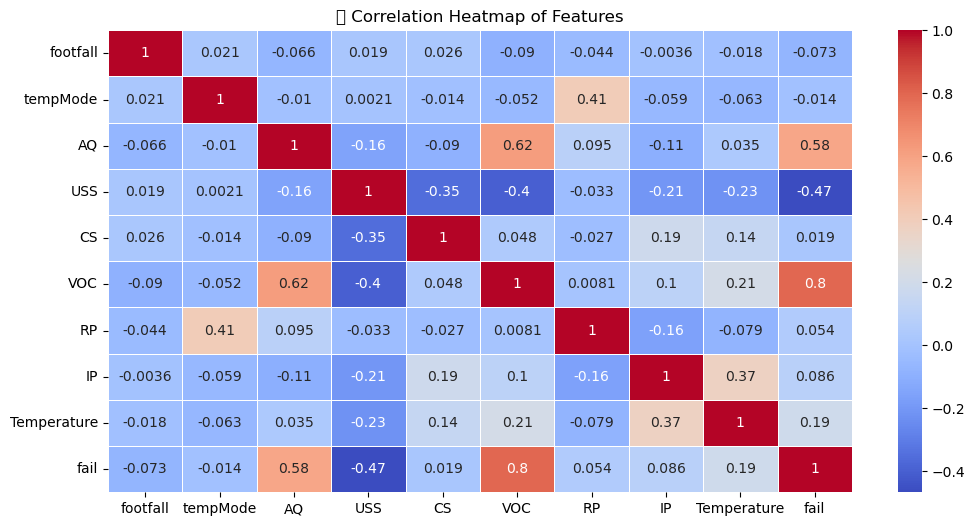

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Correlation Heatmap of Features")
plt.show()

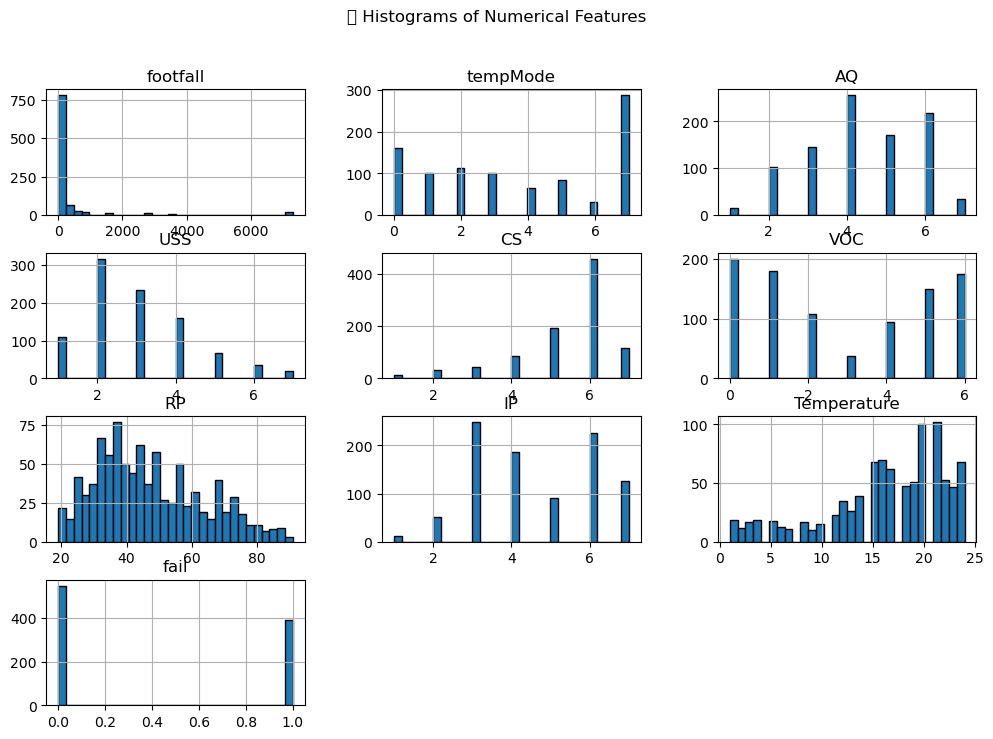

In [ ]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("📊 Histograms of Numerical Features")
plt.show()

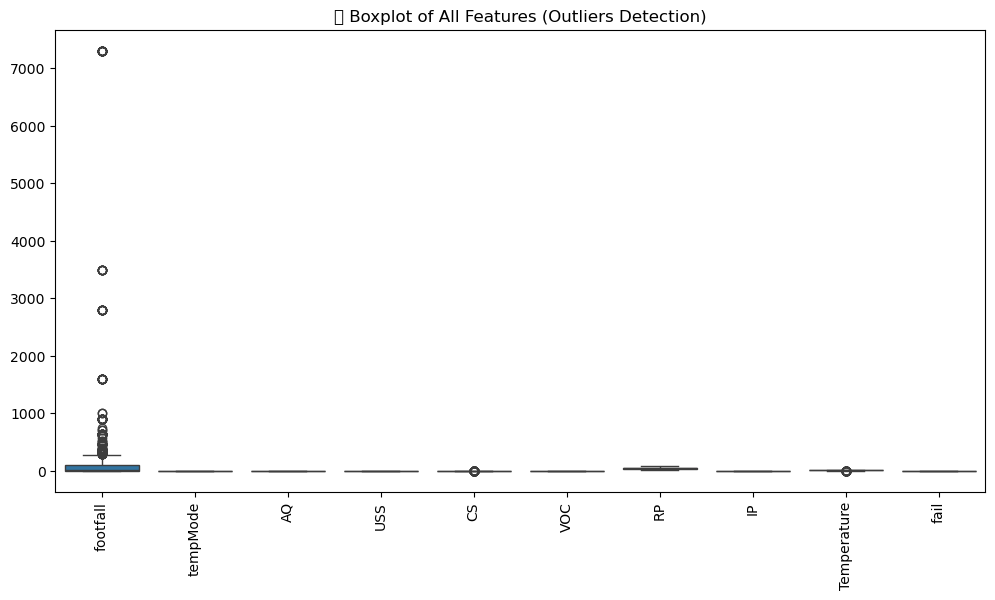

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("📦 Boxplot of All Features (Outliers Detection)")
plt.show()

In [ ]:
#failure count

 Found failure column: fail


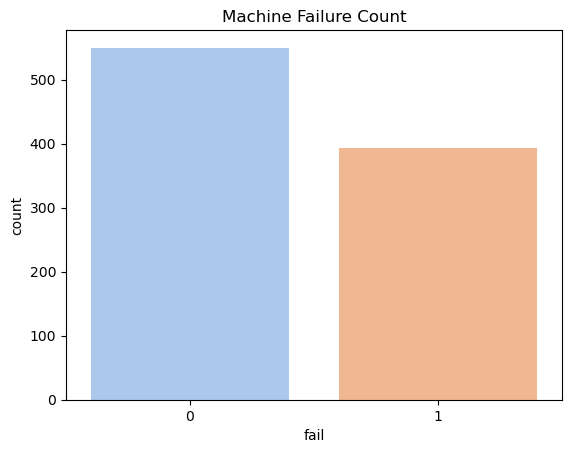

In [ ]:
failure_column = [col for col in df.columns if "fail" in col.lower()]
if failure_column:
    failure_column = failure_column[0]
    print(f" Found failure column: {failure_column}")
    sns.countplot(x=df[failure_column], palette="pastel")
    plt.title("Machine Failure Count")
    plt.show()
else:
    print("⚠️ No failure column found in dataset! Check column names:", df.columns)


 Found failure column: fail


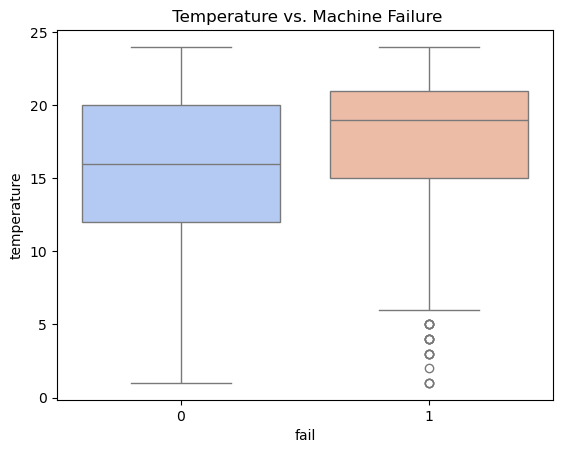

In [ ]:
failure_column = [col for col in df.columns if "fail" in col.lower()]
if failure_column:
    failure_column = failure_column[0]  # Use the first matching column
    print(f" Found failure column: {failure_column}")
    sns.boxplot(x=df[failure_column], y=df["temperature"], palette="coolwarm")
    plt.title(" Temperature vs. Machine Failure")
    plt.show()
else:
    print(" No failure column found! Check column names:", df.columns)


In [ ]:
# Temperature vs Air Quality

In [ ]:
temperature_col = [col for col in df.columns if "temp" in col.lower()]
fail_col = [col for col in df.columns if "fail" in col.lower()]

if temperature_col:
    temperature_col = temperature_col[0]
    print(f" Found temperature column: {temperature_col}")
else:
    print(" No temperature column found!")

if fail_col:
    fail_col = fail_col[0]
    print(f" Found failure column: {fail_col}")
else:
    print(" No failure column found!")


 Found temperature column: tempmode
 Found failure column: fail


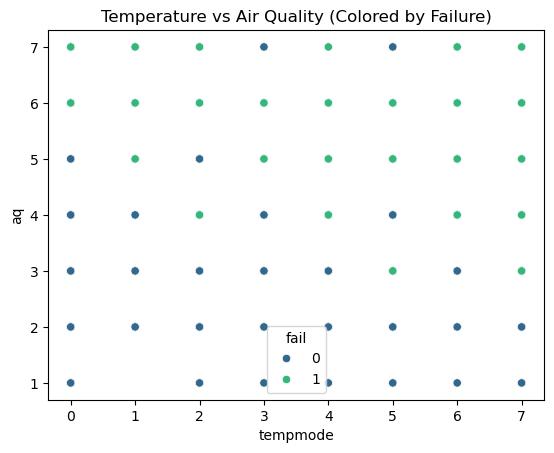

In [ ]:
sns.scatterplot(x=df[temperature_col], y=df["aq"], hue=df[fail_col], palette="viridis")
plt.title("Temperature vs Air Quality (Colored by Failure)")
plt.show()


 Found columns: Temperature → tempmode, AQ → aq, CS → cs, Fail → fail


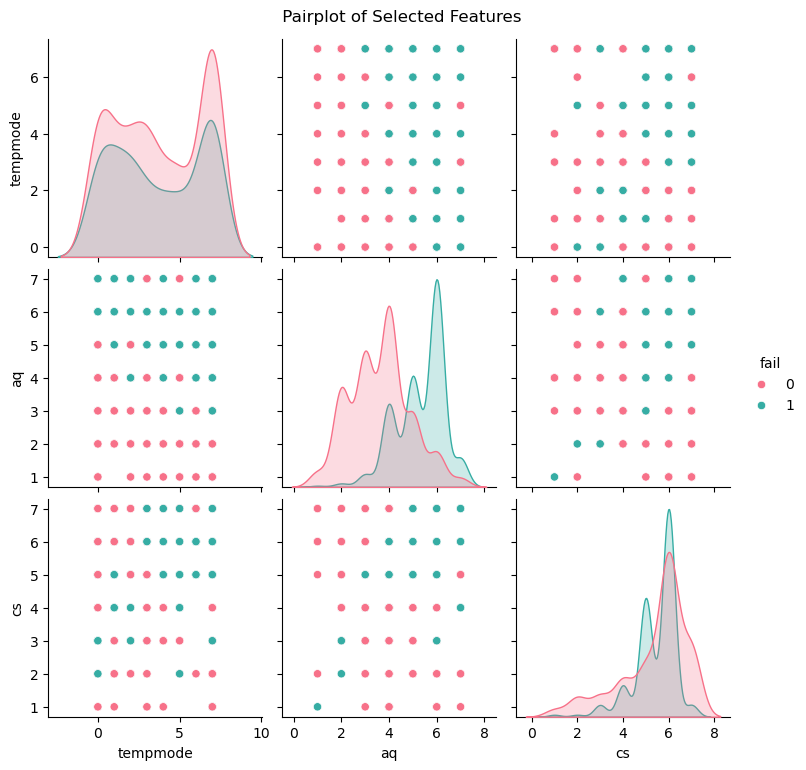

In [ ]:
# Find columns temperature, air quality, current sensor, and failure
temp_col = [col for col in df.columns if "temp" in col.lower()]
aq_col = [col for col in df.columns if "aq" in col.lower()]
cs_col = [col for col in df.columns if "cs" in col.lower()]
fail_col = [col for col in df.columns if "fail" in col.lower()]

# Assign found column names 
temp_col = temp_col[0] if temp_col else None
aq_col = aq_col[0] if aq_col else None
cs_col = cs_col[0] if cs_col else None
fail_col = fail_col[0] if fail_col else None

print(f" Found columns: Temperature → {temp_col}, AQ → {aq_col}, CS → {cs_col}, Fail → {fail_col}")

#  column missing
if not all([temp_col, aq_col, cs_col, fail_col]):
    print(" Some required columns are missing! Check dataset structure.")
else:
    # detected column names in pairplot
    selected_features = [temp_col, aq_col, cs_col, fail_col]
    sns.pairplot(df[selected_features], hue=fail_col, diag_kind="kde", palette="husl")
    plt.suptitle(" Pairplot of Selected Features", y=1.02)
    plt.show()


In [ ]:
failure_column = [col for col in df.columns if "fail" in col.lower()]
if failure_column:
    failure_column = failure_column[0]  # Select the first match
    print(f" Found failure column: {failure_column}")
else:
    print(" No failure column found! Check dataset structure.")


 Found failure column: fail


In [ ]:
X = df.drop(columns=[failure_column])  
y = df[failure_column]  


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\n📌 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))



📌 Model Accuracy: 0.783068783068783

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.78      0.75      0.77        89

    accuracy                           0.78       189
   macro avg       0.78      0.78      0.78       189
weighted avg       0.78      0.78      0.78       189



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("\n📌 Model Accuracy:", accuracy_score(y_test, y_pred))
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))


📌 Model Accuracy: 0.783068783068783

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.78      0.75      0.77        89

    accuracy                           0.78       189
   macro avg       0.78      0.78      0.78       189
weighted avg       0.78      0.78      0.78       189



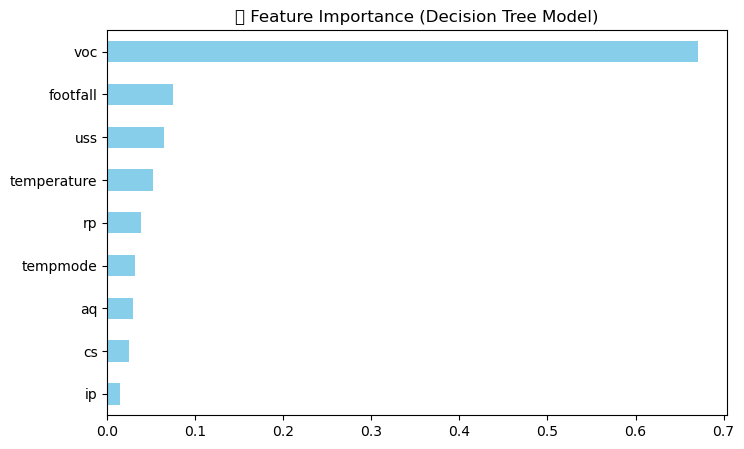

In [ ]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind="barh", figsize=(8, 5), color="skyblue")
plt.title("🔍 Feature Importance (Decision Tree Model)")
plt.show()

In [ ]:
print("\n📌 Final Shape of Dataset:", df.shape)
print(df.head())


📌 Final Shape of Dataset: (943, 10)
   footfall  tempmode  aq  uss  cs  voc  rp  ip  temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640         7   5    6   4    0  68   6            1     0
